<a href="https://colab.research.google.com/github/toddwalters/aiml-python-coding-examples/blob/feature%2Foptimize-hypermodel-creation/adlcv/projects/1697032566_performingFacialFecognitionWithDL/1697032566_ToddWalters_performingFacialFecognitionWithDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Table of contents**<a id='toc0_'></a>    
- 1. [**Performing Facial Recognition with Deep Learning**](#toc1_)    
  - 1.1. [**Project Context**](#toc1_1_)    
  - 1.2. [**Project Objectives**](#toc1_2_)    
  - 1.3. [**Project Dataset Description**](#toc1_3_)    
  - 1.4. [**Project Analysis Steps To Perform**](#toc1_4_)    
    - 1.4.1. [**Preliminary analysis**](#toc1_4_1_)    
      - 1.4.1.1. [**Import Modules and Set Default Environment Variables**](#toc1_4_1_1_)    
      - 1.4.1.2. [**[OPTIONAL] Convert Grayscale2RGB or RGB2Grayscale** ](#toc1_4_1_2_)    
      - 1.4.1.3. [**[OPTIONAL] Re-size/shape files** ](#toc1_4_1_3_)    
      - 1.4.1.4. [**[OPTIONAL] Analyze Example File Shape** ](#toc1_4_1_4_)    
      - 1.4.1.5. [**[OPTIONAL] Look for corrupt files** ](#toc1_4_1_5_)    
      - 1.4.1.6. [**[OPTIONAL] Rename Files**   ](#toc1_4_1_6_)    
      - 1.4.1.7. [**[OPTIONAL] Convert File Type**   ](#toc1_4_1_7_)    
      - 1.4.1.8. [**Plot Sample Images**](#toc1_4_1_8_)    
    - 1.4.2. [**Model Training Functions**](#toc1_4_2_)    
    - 1.4.3. [**Custom Model Training**](#toc1_4_3_)    
      - 1.4.3.1. [**Visualize Training And Validation Accuracy**](#toc1_4_3_1_)    
        - 1.4.3.1.1. [**[OPTIONAL] Plot Hyperparameter Search Results**](#toc1_4_3_1_1_)    
        - 1.4.3.1.2. [**Test Trained Custom Model**](#toc1_4_3_1_2_)    
    - 1.4.4. [**Train Model using Transfer Learning with VGG16 Pre-Trained Model**](#toc1_4_4_)    
      - 1.4.4.1. [**Visualize Training And Validation Accuracy of VGG16 Transfer Learning Based Model Training**](#toc1_4_4_1_)    
        - 1.4.4.1.1. [**Test Trained VGG16 Transfer Learning Based Trained Model**](#toc1_4_4_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

-----

# 1. <a id='toc1_'></a>[**Performing Facial Recognition with Deep Learning**](#toc0_)

-----------------------------
## 1.1. <a id='toc1_1_'></a>[**Project Context**](#toc0_)
-----------------------------

You are working for Face2Gene, an American AI company that has developed a
healthcare app for doctors. The app utilizes deep learning algorithms to aid in diagnosing
patients for genetic disorders and their variants. It converts patient photos into de-identified
mathematical facial descriptors, which are then compared to syndrome-specific computational-
based classifiers to determine similarity. The app provides a prioritized list of syndromes with
similar morphology and suggests phenotypic traits and genes for feature annotation and
syndrome prioritization.
  
Management has given priority to empowering and entrusting the in-house AI team. As a new
member of the team, your task is to build a baseline model for facial recognition. The goal is to
further enhance the app's existing features and add more value to the business based on this
baseline model.

-----------------------------
## 1.2. <a id='toc1_2_'></a>[**Project Objectives**](#toc0_)
-----------------------------

Create a facial recognition tool using a relevant deep learning algorithm, leveraging
the provided resources.

-----------------------------
## 1.3. <a id='toc1_3_'></a>[**Project Dataset Description**](#toc0_)
-----------------------------

The ORL Database of Faces consists of 400 images from 40 different subjects.
The images were captured at different times, under varying lighting conditions, with different
facial expressions (open, closed eyes, smiling, not smiling), and with or without glasses. All the
images have a dark homogeneous background, and the subjects are positioned upright and
frontal with some tolerance for side movement. Each image has a size of 92x112 pixels and 256
grey levels per pixel.
  
Data can be downloaded from the following link:
https://www.kaggle.com/datasets/kasikrit/att-database-of-faces

-----------------------------------
## 1.4. <a id='toc1_4_'></a>[**Project Analysis Steps To Perform**](#toc0_)
-----------------------------------

The following steps will guide you in building the model.
  
1. Import the relevant packages and collect all the necessary dependencies.
  
2. Upload and import the data.
  
3. View a few images to get a sense of the data.
  
4. Create a validation framework and split the data into train, test, and validation datasets.
  
5. Perform necessary transformations to prepare the data for input to the CNN model.
  
6. Build a CNN model with three main layers: a convolutional layer, a pooling layer, and a fully
connected layer. You can also consider utilizing state-of-the-art architectures using transfer
learning.
  
7. Train the model using the prepared data.
  
8. Plot the results to evaluate the model's performance.
  
9. Iterate on the model, making adjustments and improvements, until you achieve an accuracy
above 90%.



### 1.4.1. <a id='toc1_4_1_'></a>[**Preliminary analysis**](#toc0_)

#### 1.4.1.1. <a id='toc1_4_1_1_'></a>[**Import Modules and Set Default Environment Variables**](#toc0_)

In [2]:
!pip install python-dotenv keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.4 MB/s eta 0:00:00


In [91]:
import gc
import glob
import json
import logging
import math
import os
import random
import re
import sys
import traceback
import warnings
from datetime import datetime
from collections import Counter

import cv2
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import tensorflow as tf
import yaml
from dotenv import load_dotenv
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

import tensorflow.keras.backend as K
from tensorflow.keras.applications import (
    EfficientNetB0,
    InceptionV3,
    MobileNetV2,
    ResNet50V2,
    VGG16
)
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.applications.resnet_v2 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.callbacks import (
    Callback,
    EarlyStopping,
    LambdaCallback,
    LearningRateScheduler,
    ModelCheckpoint,
    ReduceLROnPlateau
)
from tensorflow.keras.layers import (
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    GlobalAveragePooling2D,
    Input,
    MaxPooling2D,
    RandomRotation,
    RandomFlip,
    RandomZoom,
    RandomContrast,
    RandomBrightness,
    RandomTranslation,
    Rescaling
)
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.utils import Sequence
from tensorflow.keras.metrics import Precision, Recall, AUC, Metric
from tensorflow.keras.preprocessing import image
# from keras_vggface.vggface import VGGFace
# from keras_vggface.utils import preprocess_input as vggface_preprocess_input

# Import Keras Tuner modules
from keras_tuner import (
    Hyperband,
    HyperModel,
    HyperParameters,
    BayesianOptimization,
    RandomSearch
)

try:
    from google.colab import drive
    # drive.mount('/content/drive')
    load_dotenv(verbose=True, dotenv_path='.env', override=True)
    DATASET_PATH = os.getenv('COLAB_DATASET_PATH')
    print("Running in Google Colab environment")
except ModuleNotFoundError:
    load_dotenv(verbose=True, dotenv_path='.env', override=True)
    DATASET_PATH = os.getenv('DATASET_PATH', default='/default/dataset/path')
    print("Running in local environment\n")

# Global logger
frogger = logging.getLogger(__name__)

def configure_logging(log_level=logging.DEBUG):
    """
    Configures the logging level for the application.

    Args:
        log_level: The desired logging level (e.g., logging.DEBUG, logging.INFO, logging.ERROR).
    """
    # Clear existing logging configuration
    frogger.handlers = []

    # Configure the new logging level
    logging.basicConfig(
        level=log_level,
        format='%(asctime)s - %(levelname)s - %(message)s',
        handlers=[logging.StreamHandler()]
    )
    frogger.setLevel(log_level)
    frogger.info(f"Logging level set to: {logging.getLevelName(log_level)}")

# Set the logging level
configure_logging(logging.DEBUG)


INFO:__main__:Logging level set to: DEBUG


Running in Google Colab environment


**Explanations:**

- This code block imports necessary libraries (`pandas`, `numpy`, `matplotlib`, and `seaborn`) and reads the three CSV files into pandas DataFrames. It then displays the first few rows of each dataset to give an initial view of the data.

**Why It Is Important:**

- Importing and examining the datasets is crucial as it allows us to understand the structure and content of our data. This step helps identify any immediate issues with data formatting or missing values and provides a foundation for all subsequent analyses.

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.2. <a id='toc1_4_1_2_'></a>[**[OPTIONAL] Convert Grayscale2RGB or RGB2Grayscale**](#toc0_)  [&#8593;](#toc0_)

In [ ]:
import cv2
import os
import numpy as np
from PIL import Image
from dotenv import load_dotenv
import logging

def convert_image(image_path, mode):
    """
    Converts an image from RGB to Grayscale or Grayscale to RGB and saves it.

    Args:
        image_path: Path to the image file to convert.
        mode: 'rgb_to_gray' to convert RGB to Grayscale or 'gray_to_rgb' to convert Grayscale to RGB.

    Returns:
        None
    """
    # Read the image using Pillow
    img = Image.open(image_path)

    # Convert Pillow image to NumPy array to check the original shape
    img_np = np.array(img)
    frogger.info(f"Original Image shape: {img_np.shape}")

    if mode == 'rgb_to_gray':
        # Check if the image is already grayscale
        if len(img_np.shape) == 2:  # Grayscale images have only 2 dimensions
            frogger.info(f"{image_path} is already a grayscale image. No conversion needed.")
        else:
            # Convert RGB to Grayscale using OpenCV
            gray_img = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
            # Save the grayscale image using OpenCV
            cv2.imwrite(image_path, gray_img)
            # Reload the image after conversion to grayscale
            img_new = np.array(Image.open(image_path))
            frogger.info(f"New Image shape after conversion to Grayscale: {img_new.shape}")

    elif mode == 'gray_to_rgb':
        # If the image is grayscale, convert it to RGB using OpenCV
        if len(img_np.shape) == 2:  # Grayscale images have only 2 dimensions
            rgb_img = cv2.cvtColor(img_np, cv2.COLOR_GRAY2RGB)
            # Save the RGB image using OpenCV
            cv2.imwrite(image_path, rgb_img)

            # Reload the image after conversion to RGB
            img_new = np.array(Image.open(image_path))
            frogger.info(f"New Image shape after conversion to RGB: {img_new.shape}")
        else:
            frogger.info(f"{image_path} is already in RGB format.")

    else:
        raise ValueError("Invalid mode. Use 'rgb_to_gray' or 'gray_to_rgb'.")

def process_images_in_directory(root_dir, mode='rgb_to_gray'):
    """
    Recursively processes all images in the given directory and subdirectories,
    converting them based on the provided mode (RGB to Grayscale or Grayscale to RGB).

    Args:
        root_dir: The root directory containing subdirectories with images.
        mode: 'rgb_to_gray' or 'gray_to_rgb' to define the conversion type.

    Returns:
        None
    """
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            # Check if the file is an image (e.g., with jpg, png extension)
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(subdir, file)

                # Convert the image based on the specified mode
                convert_image(file_path, mode)

# root_directory = f'{DATASET_PATH}/att_faces_png'
root_directory = '/Users/toddwalters/Library/CloudStorage/GoogleDrive-toddw4271@gmail.com/My Drive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_3chan_orig'
frogger.info(f'root_directory: {root_directory}')
process_images_in_directory(root_directory, mode='gray_to_rgb') #  gray_to_rgb or rgb_to_gray
# process_images_in_directory(root_directory, mode='rgb_to_gray') #  gray_to_rgb or rgb_to_gray

#### 1.4.1.3. <a id='toc1_4_1_3_'></a>[**[OPTIONAL] Re-size/shape files**](#toc0_)  [&#8593;](#toc0_)

In [61]:
import yaml
import os
from PIL import Image

def load_config(config_path='config.yaml'):
    with open(config_path, 'r') as file:
        config = yaml.safe_load(file)
    return config

def resize_image(image_path, target_size):
    """
    Resizes an image to the target size.

    Args:
        image_path (str): Path to the image file.
        target_size (tuple): Target size as (width, height).

    Returns:
        None
    """
    with Image.open(image_path) as img:
        img_resized = img.resize(target_size, Image.Resampling.LANCZOS)
        img_resized.save(image_path)

def resize_images_in_directory(root_dir, target_size):
    """
    Recursively resizes all images in the given directory and subdirectories.

    Args:
        root_dir (str): The root directory containing subdirectories with images.
        target_size (tuple): Target size as (width, height).

    Returns:
        None
    """
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.pgm')):
                file_path = os.path.join(subdir, file)
                resize_image(file_path, target_size)

# Load configuration
config = load_config()
input_shape = config['model']['input_shape']

# Example usage
root_directory = f'{DATASET_PATH}/validation_dataset_png_224x224x3'
target_size = (input_shape[1], input_shape[0])  # (width, height)
resize_images_in_directory(root_directory, target_size)

#### 1.4.1.4. <a id='toc1_4_1_4_'></a>[**[OPTIONAL] Analyze Example File Shape**](#toc0_)  [&#8593;](#toc0_)

In [93]:
import os
from PIL import Image
from dotenv import load_dotenv
import numpy as np

# Open an image file
# image_path = 'att_faces_png_224x224x3/s1/1.png'
# image_path = 'att_faces_png_112x92x3/s1/1.png'
# image_path = 'att_faces/s1/1.pgm'
image_path = 'validation_dataset_png_224x224x3/s15-6.png'
image = Image.open(f'{DATASET_PATH}/{image_path}')

# Get dimensions
width, height = image.size

# Check the image mode
mode = image.mode

frogger.info(f"Image mode: {mode}")
frogger.info(f"Width: {width}, Height: {height}")

img_np = np.array(image)

# Determine if the image is color or black and white
if len(img_np.shape) == 2:
    frogger.info(f"Image array shape: {img_np.shape}")
    frogger.info("The image has 1 channel (Grayscale).")
elif len(img_np.shape) == 3:
    channels = img_np.shape[2]
    frogger.info(f"Image array shape: {img_np.shape}")
    if channels == 3:
        frogger.info("The image has 3 channels (RGB).")
    elif channels == 4:
        frogger.info("The image has 4 channels (RGBA).")
    else:
        frogger.info(f"Unexpected number of channels: {channels}")

    # Check if all color channels are the same
    if channels in [3, 4] and np.array_equal(img_np[:, :, 0], img_np[:, :, 1]) and np.array_equal(img_np[:, :, 1], img_np[:, :, 2]):
        frogger.info("The color channels are all the same. The image is Grayscale.")
    else:
        frogger.info("The image is Color.")
else:
    frogger.info("Unexpected shape for the image.")

INFO:__main__:Image mode: RGB
INFO:__main__:Width: 224, Height: 224
INFO:__main__:Image array shape: (224, 224, 3)
INFO:__main__:The image has 3 channels (RGB).
INFO:__main__:The color channels are all the same. The image is Grayscale.


#### 1.4.1.5. <a id='toc1_4_1_5_'></a>[**[OPTIONAL] Look for corrupt files**](#toc0_)  [&#8593;](#toc0_)

In [ ]:
def verify_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif', '.pgm', '.pnm', '.webp')):
                file_path = os.path.join(root, file)
                try:
                    img = Image.open(file_path)
                    img.verify()
                except (IOError, SyntaxError) as e:
                    print(f'Bad file: {file_path}')
                    os.remove(file_path)
                    print(f'Deleted bad file: {file_path}')

# verify_images(f'{DATASET_PATH}/dataset_test')
# verify_images(f'{DATASET_PATH}/structure_dataset')

**Explanations:**

- This code examines the shape, structure, and quality of each dataset. It checks the number of rows and columns, data types of each column, presence of missing values, and existence of duplicate entries.

**Why It Is Important:**

- Understanding the dataset's structure and quality is crucial for data preprocessing and analysis. It helps identify potential issues like missing data or duplicates that need to be addressed before proceeding with the analysis.

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.6. <a id='toc1_4_1_6_'></a>[**[OPTIONAL] Rename Files**](#toc0_)    [&#8593;](#toc0_)

In [ ]:
def random_string(length):
    """Generate a random string of fixed length"""
    letters = string.ascii_lowercase + string.digits
    return ''.join(random.choice(letters) for i in range(length))

def rename_files(directory):
    for root, dirs, files in os.walk(directory):
        for filename in files:
            # Generate a unique name
            new_name = str(uuid.uuid4())

            # Get the file extension
            file_extension = os.path.splitext(filename)[1]

            # Create the new filename
            new_filename = f"{new_name}.{file_extension}"

            # Full paths
            old_file = os.path.join(root, filename)
            new_file = os.path.join(root, new_filename)

            # Rename the file
            os.rename(old_file, new_file)
            print(f"Renamed: {filename} -> {new_filename}")

# Uncomment if you want to rename all of the files in the dataset
# directories = [f'{DATASET_PATH}/structures_dataset', f'{DATASET_PATH}/dataset_test']
# for start_directory in directories:
#     rename_files(start_directory)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.7. <a id='toc1_4_1_7_'></a>[**[OPTIONAL] Convert File Type**](#toc0_)    [&#8593;](#toc0_)

In [ ]:
def convert_pgm_to_png(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    for root, dirs, files in os.walk(input_dir):
        # Create corresponding subdirectories in output_dir
        rel_path = os.path.relpath(root, input_dir)
        output_subdir = os.path.join(output_dir, rel_path)
        os.makedirs(output_subdir, exist_ok=True)
        for filename in files:
            if filename.lower().endswith('.pgm'):
                filepath = os.path.join(root, filename)
                try:
                    with Image.open(filepath) as img:
                        img = img.convert('RGB')  # Convert to RGB
                        new_filename = os.path.splitext(filename)[0] + '.png'
                        output_path = os.path.join(output_subdir, new_filename)
                        img.save(output_path, 'PNG')
                except Exception as e:
                    print(f"Error converting {filepath}: {e}")
                    print(traceback.format_exc())

# Usage
input_dir = '/content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/att_faces/'  # Your current dataset path with PGM files
output_dir = '/content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/att_faces_png'  # New dataset path for PNG files
convert_pgm_to_png(input_dir, output_dir)

#### 1.4.1.8. <a id='toc1_4_1_8_'></a>[**Plot Sample Images**](#toc0_)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


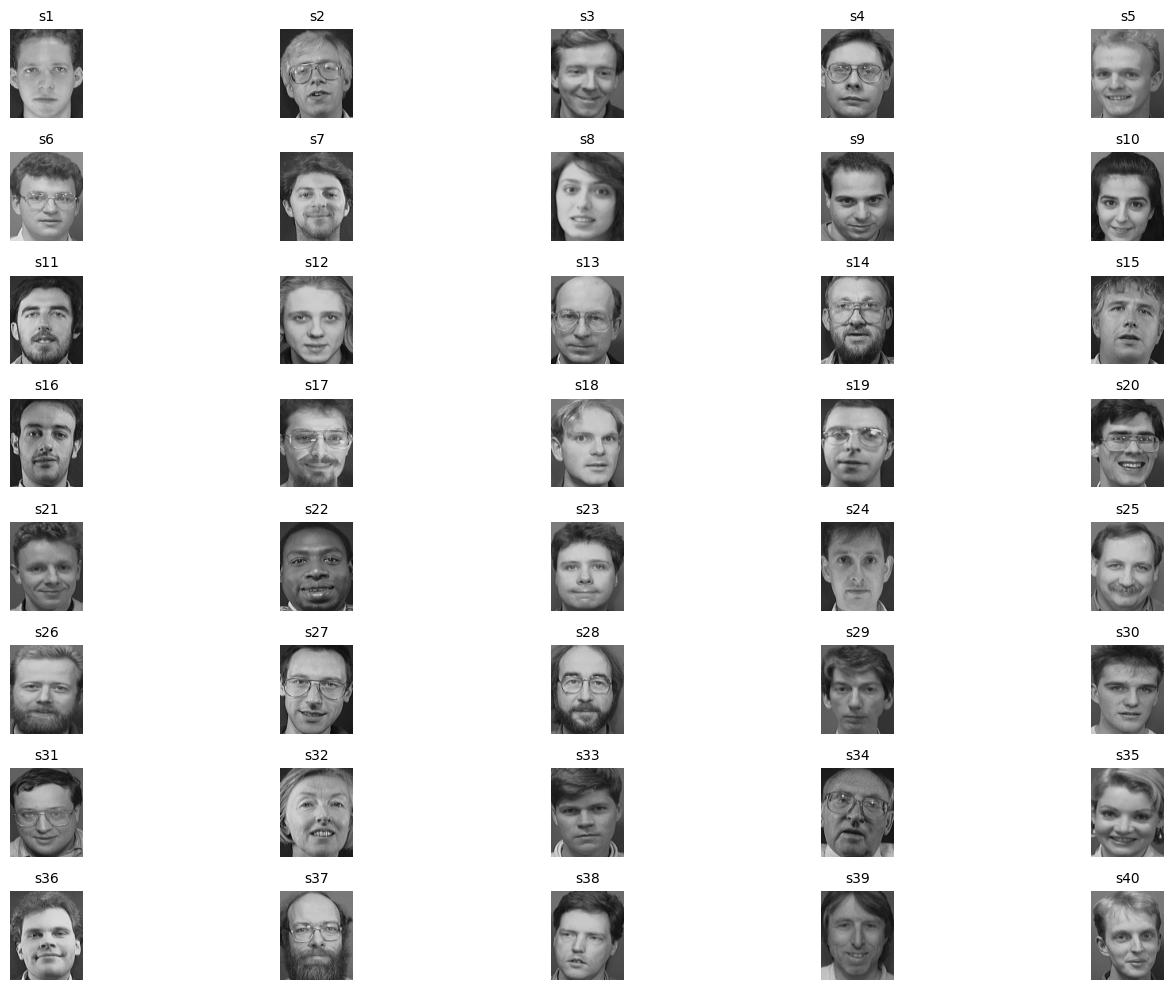

In [17]:
import cv2
import os
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import re

def natural_sort_key(s):
    """Helper function to extract the numerical part from a class name for natural sorting."""
    return int(re.search(r'\d+', s).group())

def plot_sample_images_in_grid(dataset_path, grid_rows=8, grid_cols=5):
    # Collect all classes sorted by natural order (numerical order based on 's1', 's2', ..., 's40')
    classes = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))], key=natural_sort_key)

    # Prepare the figure with an 8x5 grid
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(15, 10))

    # Plot one image per class
    for idx, class_name in enumerate(classes[:grid_rows * grid_cols]):
        class_path = os.path.join(dataset_path, class_name)
        image_name = sorted([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])[0]  # Take the first image
        image_path = os.path.join(class_path, image_name)

        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        row, col = divmod(idx, grid_cols)  # Calculate row and column position
        axes[row, col].imshow(img)
        axes[row, col].axis('off')

        # Set the class name (folder name) as the title for each image
        axes[row, col].set_title(class_name, fontsize=10)

    # Hide any unused subplots (if any)
    for i in range(len(classes), grid_rows * grid_cols):
        row, col = divmod(i, grid_cols)
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjusts the top margin; try increasing or decreasing this value
    plt.suptitle("Training History using Custom_Model_v1 with Best Performing Hyperparameters", fontsize=16, y=0.98)

    plt.show()

# Mount Google Drive if using Colab
try:
    from google.colab import drive
    drive.mount('/content/drive')
    load_dotenv(verbose=True, dotenv_path='.env', override=True)
    DATASET_PATH = os.getenv('COLAB_DATASET_PATH', default='/default/dataset/path')
except ImportError:
    load_dotenv(verbose=True, dotenv_path='.env', override=True)
    DATASET_PATH = os.getenv('DATASET_PATH', default='/default/dataset/path')

plot_sample_images_in_grid(f'{DATASET_PATH}/att_faces_png_112x92x1/', grid_rows=8, grid_cols=5)


### 1.4.2. <a id='toc1_4_2_'></a>[**Model Training Functions**](#toc0_)

In [1]:
!pip install --upgrade tensorflow

In [100]:
import gc
import glob
import json
import logging
import math
import os
import random
import re
import sys
import traceback
import warnings
from datetime import datetime
from collections import Counter

import cv2
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import tensorflow as tf
import yaml
from dotenv import load_dotenv
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

import tensorflow.keras.backend as K
from tensorflow.keras.applications import (
    EfficientNetB0,
    InceptionV3,
    MobileNetV2,
    ResNet50V2,
    VGG16
)
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.applications.resnet_v2 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.callbacks import (
    Callback,
    EarlyStopping,
    LambdaCallback,
    LearningRateScheduler,
    ModelCheckpoint,
    ReduceLROnPlateau
)
from tensorflow.keras.layers import (
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    GlobalAveragePooling2D,
    Input,
    MaxPooling2D,
    RandomRotation,
    RandomFlip,
    RandomZoom,
    RandomContrast,
    RandomTranslation,
    Rescaling
)
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.utils import Sequence
from tensorflow.keras.metrics import Precision, Recall, AUC, Metric
from tensorflow.keras.preprocessing import image
from tensorflow.keras.regularizers import l2

# from keras_vggface.vggface import VGGFace
# from keras_vggface.utils import preprocess_input as vggface_preprocess_input
from tensorflow.keras.utils import to_categorical

# Import Keras Tuner modules
from keras_tuner import (
    Hyperband,
    HyperModel,
    HyperParameters,
    BayesianOptimization,
    RandomSearch
)

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'  # Default setting

class F1Score(Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision(name='precision')
        self.recall = Recall(name='recall')


    @tf.function
    def update_state(self, y_true, y_pred, sample_weight=None):
        # Update the precision and recall variables
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    @tf.function
    def result(self):
        # Compute the F1 score
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

    @tf.function
    def reset_states(self):
        # Reset the state of the metrics
        self.precision.reset_states()
        self.recall.reset_states()

# Define mappings for architectures and preprocessing functions
ARCHITECTURES = {
    'ResNet50V2': ResNet50V2,
    'VGG16': VGG16,
    'InceptionV3': InceptionV3,
    'MobileNetV2': MobileNetV2,
    'EfficientNetB0': EfficientNetB0,
#     'VGGFace': VGGFace
}

PREPROCESSING_FUNCTIONS = {
    'resnet_preprocess': resnet_preprocess,
#     'vgg_preprocess': vgg_preprocess,
    'inception_preprocess': inception_preprocess,
    'mobilenet_preprocess': mobilenet_preprocess,
    'efficientnet_preprocess': efficientnet_preprocess
}

# Define metrics mapping
METRICS = {
    'Precision': Precision(name='precision'),
    'Recall': Recall(name='recall'),
    'AUC': AUC(name='auc'),
    'F1Score': F1Score(name='f1_score')
}

class AccuracyCallback(Callback):
    def __init__(self, target_accuracy):
        super().__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') >= self.target_accuracy:
            logger.info(f"Reached {self.target_accuracy*100}% validation accuracy. Stopping training.\n")
            self.model.stop_training = True

class CustomValidationCallback(Callback):
    def __init__(self, validation_data, validation_steps):
        super().__init__()
        self.validation_data = validation_data
        self.validation_steps = validation_steps

    def on_epoch_end(self, epoch, logs=None):
        val_loss = 0
        val_accuracy = 0
        for x, y in self.validation_data.take(self.validation_steps):
            val_metrics = self.model.test_on_batch(x, y)
            val_loss += val_metrics[0]
            val_accuracy += val_metrics[1]

        val_loss /= self.validation_steps
        val_accuracy /= self.validation_steps

        logs['val_loss'] = val_loss
        logs['val_accuracy'] = val_accuracy
        logger.debug(f"Epoch {epoch + 1} - Custom validation:")
        logger.debug(f"Loss: {val_loss:.4f}")
        logger.debug(f"Accuracy: {val_accuracy:.4f}")

class DatasetLogger(Callback):
    def __init__(self, train_dataset, val_dataset):
        super().__init__()
        self.train_dataset = train_dataset
        self.val_dataset = val_dataset

    def on_epoch_begin(self, epoch, logs=None):
        logger.debug(f"Epoch {epoch + 1} - Train samples: {tf.data.experimental.cardinality(self.train_dataset)}")
        logger.debug(f"Epoch {epoch + 1} - Val samples: {tf.data.experimental.cardinality(self.val_dataset)}")

    def on_epoch_end(self, epoch, logs=None):
        if logs is not None:
            logger.debug(f"Epoch {epoch + 1} - Train accuracy: {logs.get('accuracy', 'N/A'):.4f}")
            logger.debug(f"Epoch {epoch + 1} - Val accuracy: {logs.get('val_accuracy', 'N/A'):.4f}")

class DebugCallback(Callback):
    def on_epoch_begin(self, epoch, logs=None):
        logger.debug(f"Starting epoch {epoch + 1}\n")

    def on_batch_begin(self, batch, logs=None):
        if batch % 100 == 0:
            # logger.debug(f"Starting batch {batch}\n")
            pass

    def on_epoch_end(self, epoch, logs=None):
        logger.debug(f"End of epoch {epoch + 1}\n")
        if logs:
            for key, value in logs.items():
                logger.debug(f"{key}: {value}")
        logger.debug("--------------------\n")

class DataGenerator:
    def __init__(self, config):
        logger.debug(f"DataGenerator initialization starting.")
        self.config = config
        self.batch_size = config['data']['batch_size']
        self.input_shape = tuple(config['data']['input_shape'])
        self.target_size = tuple(config['data']['target_size'])
        self.color_mode = config['data'].get('color_mode', 'rgb').lower()
        self.num_channels = 3 if self.color_mode == 'rgb' else 1

        self.preprocessing_function_name = None

        use_pretrained_weights = config['model'].get('use_pretrained_weights', True)

        self.augmentation_params = config['augmentation']
        self.pre_split = config['data'].get('pre_split', True)

        logger.debug(f'DG batch_size = {self.batch_size}')
        logger.debug(f'DG target_zie = {self.target_size}')
        logger.debug(f'DG preprocessing_function = {self.preprocessing_function_name}')
        logger.debug(f'DG augmentation_params = {self.augmentation_params}')
        logger.debug(f'DG pre_split = {self.pre_split}')

        # Create data augmentation and rescaling layers
        self.data_augmentation = self.create_data_augmentation()

        if self.pre_split:
            logger.debug("DG Calling load_pre_split_data function.")
            self.load_pre_split_data()
        else:
            self.load_and_split_data()

    def load_pre_split_data(self):
        # Paths for pre-split data
        logger.debug("DG LPSD Starting load_pre_split_data function.")
        self.train_path = self.config['data']['train_path']
        logger.debug(f"DG LPSD Train path: {self.train_path}")
        self.test_path = self.config['data']['test_path']
        logger.debug(f"DG LPSD Test path: {self.test_path}")

        # Validate paths
        if not os.path.exists(self.train_path):
            raise FileNotFoundError(f"DG LPSD Training path not found: {self.train_path}")
        if not os.path.exists(self.test_path):
            raise FileNotFoundError(f"DG LPSD Testing path not found: {self.test_path}")

        # Load datasets
        logger.debug("DG LPSD Loading train_dataset datasets")
        self.train_dataset = tf.keras.utils.image_dataset_from_directory(
            self.train_path,
            label_mode='categorical',
            batch_size=None,  # Load as individual samples
            image_size=self.target_size,
            color_mode=self.color_mode,
            shuffle=True
        )

        logger.debug("DG LPSD Loading test_dataset datasets")
        self.test_dataset = tf.keras.utils.image_dataset_from_directory(
            self.test_path,
            label_mode='categorical',
            batch_size=None,
            image_size=self.target_size,
            color_mode=self.color_mode,
            shuffle=False
        )

        train_dataset_unbatched = self.train_dataset
        test_dataset_unbatched = self.test_dataset

        self.class_names = self.train_dataset.class_names

        logger.debug(f"DG LPSD Class names: {self.class_names}")

        # Prepare datasets
        logger.debug("DG LPSD Preparing datasets")
        self.train_dataset = self.prepare_dataset(self.train_dataset, augment=True)
        logger.debug("DG LPSD Train dataset prepared.")
        self.val_dataset = self.prepare_dataset(self.test_dataset, augment=False)
        logger.debug("DG LPSD Val dataset prepared.")
        self.test_dataset = self.val_dataset  # Use the validation dataset for testing if appropriate
        logger.debug("DG LPSD Test dataset prepared.")

        # Compute sample counts
        self.train_sample_count = tf.data.experimental.cardinality(train_dataset_unbatched).numpy()
        self.val_sample_count = tf.data.experimental.cardinality(test_dataset_unbatched).numpy()
        self.steps_per_epoch = math.ceil(self.train_sample_count / self.batch_size)
        self.validation_steps = math.ceil(self.val_sample_count / self.batch_size)

        # Compute class counts directly from the dataset's file paths
        self.class_counts = self.count_samples_from_directories(self.train_path, self.class_names)

        # Compute class weights
        self.class_weight_dict = compute_class_weights_from_counts(self.class_counts, self.class_names)

        logger.info(f'\nDG LPSD Train path: {self.train_path}')
        logger.info(f'DG LPSD Test path: {self.test_path}')
        logger.info(f'DG LPSD Batch size: {self.batch_size}')
        logger.info(f'DG LPSD Input shape: {self.input_shape}')
        logger.info(f'DG LPSD color_mode: {self.color_mode}')
        logger.info(f'DG LPSD Target size: {self.target_size}')
        logger.info(f'DG LPSD steps_per_epoch: {self.steps_per_epoch}')
        logger.info(f'DG LPSD validation_steps: {self.validation_steps}')
        logger.info(f'DG LPSD Preprocessing function: {self.preprocessing_function_name}')
        logger.info(f'DG LPSD Augmentation params: {self.augmentation_params}')
        logger.info(f'DG LPSD Class names: {self.class_names}')
        logger.info(f'DG LPSD Class counts: {self.class_counts}')
        logger.info(f'DG LPSD Class weights: {self.class_weight_dict}')
        logger.info(f'DG LPSD Training set size: {self.train_sample_count}')
        logger.info(f'DG LPSD Validation set size: {self.val_sample_count}')
        logger.info(f'DG LPSD Testing set size: {self.val_sample_count}\n')

    def count_samples_from_directories(self, dataset_path, class_names):
        import os
        counts = {}
        for class_name in class_names:
            class_dir = os.path.join(dataset_path, class_name)
            if os.path.isdir(class_dir):
                counts[class_name] = len([
                    fname for fname in os.listdir(class_dir)
                    if os.path.isfile(os.path.join(class_dir, fname))
                ])
            else:
                counts[class_name] = 0
        return counts

    def load_and_split_data(self):
        logger.debug("DG LASD Getting Class Names.")
        self.class_names = [
            d for d in sorted(os.listdir(self.config['data']['dataset_path']))
            if os.path.isdir(os.path.join(self.config['data']['dataset_path'], d))
        ]
        logger.debug(f"DG LASD Class Names: {self.class_names}")
        class_indices = {name: index for index, name in enumerate(self.class_names)}
        logger.debug(f"DG LASD Class Indices: {class_indices}")

        # Collect file paths and labels
        file_paths = []
        labels = []
        for class_name in self.class_names:
            class_dir = os.path.join(self.config['data']['dataset_path'], class_name)
            class_files = glob.glob(os.path.join(class_dir, '*'))
            file_paths.extend(class_files)
            labels.extend([class_indices[class_name]] * len(class_files))

        file_paths = np.array(file_paths)
        labels = np.array(labels)

        # First split: train and temp (val + test)
        logger.debug("DG LASD Splitting data into train and temp sets.")
        train_paths, temp_paths, train_labels, temp_labels = train_test_split(
            file_paths, labels,
            # test_size=0.4,
            test_size=float(self.config['data']['test_val_size']),
            stratify=labels,
            random_state=42
        )

        # Second split: validation and test
        logger.debug("DG LASD Splitting temp data into val and test sets.")
        val_paths, test_paths, val_labels, test_labels = train_test_split(
            temp_paths, temp_labels,
            # test_size=0.5,
            test_size=float(self.config['data']['test_val_split']),
            stratify=temp_labels,
            random_state=42
        )

        # Mapping indices back to class names for readability
        index_to_class = {index: name for name, index in class_indices.items()}

        # Training set class distribution
        train_class_counts = Counter(train_labels)
        train_class_counts_named = {index_to_class[k]: v for k, v in train_class_counts.items()}
        logger.debug(f"DG LASD Training class distribution: {train_class_counts_named}")

        # Validation set class distribution
        val_class_counts = Counter(val_labels)
        val_class_counts_named = {index_to_class[k]: v for k, v in val_class_counts.items()}
        logger.debug(f"DG LASD Validation class distribution: {val_class_counts_named}")

        # Test set class distribution
        test_class_counts = Counter(test_labels)
        test_class_counts_named = {index_to_class[k]: v for k, v in test_class_counts.items()}
        logger.debug(f"DG LASD Test class distribution: {test_class_counts_named}")

        # Store the training class counts as an attribute
        self.class_counts = train_class_counts_named

        # Create the datasets from file paths and labels**
        train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
        val_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
        test_dataset = tf.data.Dataset.from_tensor_slices((test_paths, test_labels))

        # Map the load_image function over the datasets
        logger.debug("DG LASD Creating datasets from file paths and labels.")
        train_dataset = train_dataset.map(self.load_image, num_parallel_calls=tf.data.AUTOTUNE)
        val_dataset = val_dataset.map(self.load_image, num_parallel_calls=tf.data.AUTOTUNE)
        test_dataset = test_dataset.map(self.load_image, num_parallel_calls=tf.data.AUTOTUNE)

        # Get color_mode from config (default to 'rgb')
        color_mode = self.config['data'].get('color_mode', 'rgb').lower()

        # Set the number of channels based on color mode
        channels = 3 if color_mode == 'rgb' else 1

        # Prepare datasets
        logger.debug("DG LASD Preparing datasets.")
        self.train_dataset = self.prepare_dataset(train_dataset, augment=True)
        self.val_dataset = self.prepare_dataset(val_dataset, augment=False)
        self.test_dataset = self.prepare_dataset(test_dataset, augment=False)

        # Compute sample counts
        logger.debug("DG LASD Computing sample counts.")
        self.train_sample_count = len(train_paths)
        self.val_sample_count = len(val_paths)
        self.test_sample_count = len(test_paths)

        self.steps_per_epoch = math.ceil(self.train_sample_count / self.batch_size)
        self.validation_steps = math.ceil(self.val_sample_count / self.batch_size)
        self.test_steps = math.ceil(self.test_sample_count / self.batch_size)

        # Compute class counts directly from the dataset's file paths
        self.class_counts = self.count_samples_from_directories(self.config['data']['dataset_path'], self.class_names)

        logger.info(f'\nDG LASD Batch size: {self.batch_size}')
        logger.info(f'DG LASD Input shape: {self.input_shape}')
        logger.info(f'DG LASD color_mode: {self.color_mode}')
        logger.info(f'DG LASD Target size: {self.target_size}')
        logger.info(f'DG LASD Steps per epoch: {self.steps_per_epoch}')
        logger.info(f'DG LASD Validation steps: {self.validation_steps}')
        logger.info(f'DG LASD Test steps: {self.test_steps}')
        logger.info(f'DG LASD Augmentation params: {self.augmentation_params}')
        logger.info(f'DG LASD Class names: {self.class_names}')
        logger.info(f'DG LASD Class counts: {self.class_counts}')
        logger.info(f'DG LASD Training sample size: {self.train_sample_count}')
        logger.info(f'DG LASD Training class distribution: {train_class_counts_named}')
        logger.info(f'DG LASD Validation sample size: {self.val_sample_count}')
        logger.info(f'DG LASD Validation class distribution: {val_class_counts_named}')
        logger.info(f'DG LASD Test sample size: {self.test_sample_count}')
        logger.info(f'DG LASD Test class distribution: {test_class_counts_named}')

    # Define the load_image function inside the method
    @tf.function
    def load_image(self, file_path, label):
        # Read the image from file
        image = tf.io.read_file(file_path)
        # Decode the image data (supports JPEG, PNG, BMP, and GIF)
        image = tf.image.decode_image(image, channels=self.num_channels)

        # Log the original size of the image
        original_size = image.shape
        logger.debug(f"File path: {file_path}, Original size: {original_size}")

        # Set static shape if possible
        if self.num_channels == 3:
            image.set_shape([None, None, 3])
        else:
            image.set_shape([None, None, 1])

        # Convert image to float32 and resize
        image = tf.cast(image, tf.float32)

        # Resize image to target size
        image = tf.image.resize(image, self.target_size)

        # Log the new size of the image
        new_size = image.shape
        logger.debug(f"File path: {file_path}, New size: {new_size}")

        # One-hot encode the label
        label = tf.one_hot(label, depth=len(self.class_names))
        return image, label

    @tf.function
    def prepare_dataset(self, dataset, augment):
        if augment:
            try:
                dataset = dataset.map(self.augment, num_parallel_calls=tf.data.AUTOTUNE)
                dataset = dataset.shuffle(1000).repeat()
            except Exception as e:
                logger.error(f"DG SD An error occurred trying to prepare dataset with augment true: {e}")
                logger.debug(traceback.format_exc())
        else:
            dataset = dataset.cache()
        dataset = dataset.batch(self.batch_size).prefetch(tf.data.AUTOTUNE)
        return dataset

    def get_dataset_size(self, dataset):
        return tf.data.experimental.cardinality(dataset).numpy() * self.batch_size

    def create_data_augmentation(self):
        layers = []
        augmentation_params = self.augmentation_params

        # Apply augmentations based on parameters
        if augmentation_params.get('rotation_range'):
            rotation_range = augmentation_params['rotation_range']
            factor = rotation_range / 360.0  # Convert degrees to fraction of full circle
            # Ensure factor is within [-1.0, 1.0]
            factor = max(min(factor, 1.0), -1.0)
            layers.append(RandomRotation(factor=(-factor, factor)))

        if augmentation_params.get('horizontal_flip'):
            layers.append(RandomFlip(mode='horizontal'))

        if augmentation_params.get('vertical_flip'):
            layers.append(RandomFlip(mode='vertical'))

        if augmentation_params.get('zoom_range'):
            zoom = augmentation_params['zoom_range']
            # RandomZoom expects height_factor and width_factor in [-1.0, 1.0]
            # Ensure zoom is within [0.0, 1.0] to avoid invalid factors
            zoom = max(min(zoom, 1.0), 0.0)
            layers.append(RandomZoom(height_factor=(-zoom, zoom), width_factor=(-zoom, zoom)))

        if augmentation_params.get('width_shift_range') or augmentation_params.get('height_shift_range'):
            width_shift = augmentation_params.get('width_shift_range', 0.0)
            height_shift = augmentation_params.get('height_shift_range', 0.0)
            # RandomTranslation expects height_factor and width_factor in [-1.0, 1.0]
            width_shift = max(min(width_shift, 1.0), -1.0)
            height_shift = max(min(height_shift, 1.0), -1.0)
            layers.append(RandomTranslation(height_factor=height_shift, width_factor=width_shift))

        if augmentation_params.get('brightness_range'):
            brightness = augmentation_params['brightness_range']
            # RandomBrightness expects factor in [0.0, inf), but to avoid extreme brightness, cap it
            # brightness = max(brightness, 0.0)
            # layers.append(RandomBrightness(factor=brightness))

            # Replace RandomBrightness with a Lambda layer using tf.image.random_brightness
            layers.append(tf.keras.layers.Lambda(lambda x: tf.image.random_brightness(x, max_delta=brightness)))

        if augmentation_params.get('contrast_range'):
            contrast = augmentation_params['contrast_range']
            # RandomContrast expects factor in [0.0, inf), but to avoid extreme contrast, cap it
            contrast = max(contrast, 0.0)
            layers.append(RandomContrast(factor=contrast))

        if not layers:
            layers.append(tf.keras.layers.Lambda(lambda x: x))

        data_augmentation = tf.keras.Sequential(layers)
        return data_augmentation

    @tf.function
    def augment(self, images, labels):
        images = tf.cast(images, tf.float32)
        # Apply data augmentation
        images = self.data_augmentation(images)
        return images, labels

    def create_datasets(self):
        return None

class BaseModelBuilder:
    """
    A base class that handles shared functionality for building models.
    """
    def __init__(self, config, num_classes):
        self.config = config
        self.num_classes = num_classes

    def select_optimizer(self, hp, config_section, prefix=''):
        """
        Selects and returns an optimizer based on hyperparameters.

        Args:
            hp (HyperParameters): Hyperparameters object.
            config_section (dict): Configuration section for hyperparameters.
            prefix (str): Prefix for hyperparameter names.

        Returns:
            optimizer: An instance of a Keras optimizer.
        """
        optimizer_choice = hp.Choice(
            f'{prefix}optimizer',
            values=config_section['optimizer']['choices'],
            default=config_section['optimizer']['default']
        )
        learning_rate = hp.Float(
            f'{prefix}learning_rate',
            min_value=float(config_section['learning_rate']['min']),
            max_value=float(config_section['learning_rate']['max']),
            sampling='log',
            default=float(config_section['learning_rate']['default'])
        )
        if optimizer_choice == 'adam':
            return Adam(learning_rate=learning_rate)
        elif optimizer_choice == 'sgd':
            return SGD(learning_rate=learning_rate)
        else:
            return Adam(learning_rate=learning_rate)  # Default to Adam

    def compile_model(self, model, optimizer):
        """
        Compiles the model with the selected optimizer and metrics.

        Args:
            model (Model): Keras model to compile.
            optimizer: Optimizer to use.
        """
        metrics = ['accuracy'] + [METRICS[metric] for metric in self.config['model']['additional_metrics'] if METRICS[metric]]
        model.compile(
            optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=metrics
        )

class PretrainedModelBuilder(BaseModelBuilder):
    """
    Builds a model using a pre-trained architecture.
    """

    def get_preprocessing_function(self, model_name):
        if model_name == 'resnet50v2':
            return tf.keras.applications.resnet_v2.preprocess_input
        elif model_name == 'vgg16':
            return tf.keras.applications.vgg16.preprocess_input
        elif model_name == 'inceptionv3':
            return tf.keras.applications.inception_v3.preprocess_input
        elif model_name == 'mobilenetv2':
            return tf.keras.applications.mobilenet_v2.preprocess_input
        elif model_name == 'efficientnetb0':
            return tf.keras.applications.efficientnet.preprocess_input
        elif model_name == 'vggface':
            from keras_vggface.utils import preprocess_input as vggface_preprocess_input
            return lambda x: vggface_preprocess_input(x, version=2)
        else:
            return None  # No preprocessing function available

    def build_model(self, hp):
        model_name = self.config['model']['name']
        input_shape = tuple(self.config['model']['input_shape'])
        use_pretrained_weights = self.config['model'].get('use_pretrained_weights', True)
        base_model_weights = 'imagenet' if use_pretrained_weights else None

        # Load the appropriate architecture
        architecture = ARCHITECTURES[model_name]

        logger.info(f"PMB-bm Building model with pre-trained model {model_name} with input shape {input_shape} and using the {base_model_weights} base model weights\n")

        # Input layer
        inputs = Input(shape=input_shape, name='input_layer')

        # Include preprocessing layer
        preprocessing_function = self.get_preprocessing_function(model_name)

        if preprocessing_function:
            x = tf.keras.layers.Lambda(preprocessing_function)(inputs)
        else:
            x = inputs

        # Load the base model
        base_model = architecture(
            weights=base_model_weights,
            include_top=False,
            input_tensor=x,
            pooling='avg',  # Use global average pooling
            # name='base_model'  # Assign a name for easy access
        )
        base_model.trainable = False

        # Get the output from the base model
        x = base_model.output

        # Hyperparameters
        num_dense_layers = hp.Int(
            'num_dense_layers',
            min_value=self.config['hyperparameters']['pretrained_model']['num_dense_layers']['min'],
            max_value=self.config['hyperparameters']['pretrained_model']['num_dense_layers']['max'],
            default=self.config['hyperparameters']['pretrained_model']['num_dense_layers']['default']
        )
        dense_units = hp.Int(
            'dense_units',
            min_value=self.config['hyperparameters']['pretrained_model']['dense_units']['min'],
            max_value=self.config['hyperparameters']['pretrained_model']['dense_units']['max'],
            step=self.config['hyperparameters']['pretrained_model']['dense_units']['step'],
            default=self.config['hyperparameters']['pretrained_model']['dense_units']['default']
        )
        dropout_rate = hp.Float(
            'dropout_rate',
            min_value=self.config['hyperparameters']['pretrained_model']['dropout_rate']['min'],
            max_value=self.config['hyperparameters']['pretrained_model']['dropout_rate']['max'],
            step=self.config['hyperparameters']['pretrained_model']['dropout_rate']['step'],
            default=self.config['hyperparameters']['pretrained_model']['dropout_rate']['default']
        )
        use_batch_norm = hp.Boolean(
            'use_batch_norm',
            default=self.config['hyperparameters']['pretrained_model']['use_batch_norm']['default']
        )

        # Build the classification head
        for _ in range(num_dense_layers):
            x = Dense(dense_units, activation='relu')(x)
            if use_batch_norm:
                x = BatchNormalization()(x)
            if dropout_rate > 0.0:
                x = Dropout(dropout_rate)(x)

        # Output layer
        outputs = Dense(self.num_classes, activation='softmax')(x)

        # Create the model
        model = Model(inputs=inputs, outputs=outputs)

        # Select optimizer
        optimizer = self.select_optimizer(hp, self.config['hyperparameters']['pretrained_model'])

        # Compile the model
        self.compile_model(model, optimizer)

        print(f'The model output shape is: {model.output_shape}\n')
        print(f'The model input shape is: {model.input_shape}\n')

        print("Model Summary:")
        model.summary()

        print("\nModel Name:")
        print(model.name)

        print("\nInput Shape:")
        print(model.input_shape)

        print("\nOutput Shape:")
        print(model.output_shape)

        print("\nTotal Parameters:")
        print(model.count_params())

        print("\nLayers:")
        for layer in model.layers:
            print(f"Layer Name: {layer.name}")
            print(f"  Type: {type(layer)}")
            print(f"  Input Shape: {layer.input_shape}")
            print(f"  Output Shape: {layer.output_shape}")
            print(f"  Number of Parameters: {layer.count_params()}")
            print(f"  Trainable: {layer.trainable}\n")

        print("\nOptimizer:")
        print(model.optimizer)

        print("\nLoss Function:")
        print(model.loss)

        print("\nIs Model Compiled:")
        print(model._is_compiled)
        print("\n")

        return model

class CustomModelBuilder(BaseModelBuilder):
    """
    Builds a custom model from scratch.
    """
    def build_model(self, hp):
        logger.info(f'CMB-mb Building model from scratch.\n')

        input_shape = tuple(self.config['data']['input_shape'])
        inputs = Input(shape=input_shape)

        # Include rescaling to [0, 1]
        x = Rescaling(1./255)(inputs)

        # Hyperparameters
        num_conv_layers = hp.Int(
            'num_conv_layers',
            min_value=self.config['hyperparameters']['scratch_model']['num_conv_layers']['min'],
            max_value=self.config['hyperparameters']['scratch_model']['num_conv_layers']['max'],
            default=self.config['hyperparameters']['scratch_model']['num_conv_layers']['default']
        )
        filters = hp.Int(
            'conv_filters_scratch',
            min_value=self.config['hyperparameters']['scratch_model']['conv_filters_scratch']['min'],
            max_value=self.config['hyperparameters']['scratch_model']['conv_filters_scratch']['max'],
            step=self.config['hyperparameters']['scratch_model']['conv_filters_scratch']['step'],
            default=self.config['hyperparameters']['scratch_model']['conv_filters_scratch']['default']
        )
        kernel_size = hp.Choice(
            'conv_kernel_size_scratch',
            values=self.config['hyperparameters']['scratch_model']['conv_kernel_size_scratch']['choices'],
            default=self.config['hyperparameters']['scratch_model']['conv_kernel_size_scratch']['default']
        )
        use_conv_batch_norm = hp.Boolean(
            'use_conv_batch_norm_scratch',
            default=self.config['hyperparameters']['scratch_model']['use_conv_batch_norm_scratch']['default']
        )
        conv_dropout_rate = hp.Float(
            'conv_dropout_rate_scratch',
            min_value=float(self.config['hyperparameters']['scratch_model']['conv_dropout_rate_scratch']['min']),
            max_value=float(self.config['hyperparameters']['scratch_model']['conv_dropout_rate_scratch']['max']),
            step=float(self.config['hyperparameters']['scratch_model']['conv_dropout_rate_scratch']['step']),
            default=float(self.config['hyperparameters']['scratch_model']['conv_dropout_rate_scratch']['default'])
        )

        # Build convolutional layers
        for i in range(num_conv_layers):
            x = Conv2D(filters=filters, kernel_size=(kernel_size, kernel_size), activation='relu', padding='same')(x)
            if use_conv_batch_norm:
                x = BatchNormalization()(x)
            x = MaxPooling2D((2, 2))(x)
            if conv_dropout_rate > 0.0:
                x = Dropout(conv_dropout_rate)(x)

        x = Flatten()(x)

        # Dense layers
        num_dense_layers = hp.Int(
            'num_dense_layers_scratch',
            min_value=self.config['hyperparameters']['scratch_model']['num_dense_layers_scratch']['min'],
            max_value=self.config['hyperparameters']['scratch_model']['num_dense_layers_scratch']['max'],
            default=self.config['hyperparameters']['scratch_model']['num_dense_layers_scratch']['default']
        )
        dense_units = hp.Int(
            'dense_units_scratch',
            min_value=self.config['hyperparameters']['scratch_model']['dense_units_scratch']['min'],
            max_value=self.config['hyperparameters']['scratch_model']['dense_units_scratch']['max'],
            step=self.config['hyperparameters']['scratch_model']['dense_units_scratch']['step'],
            default=self.config['hyperparameters']['scratch_model']['dense_units_scratch']['default']
        )
        dropout_rate = hp.Float(
            'dropout_rate_scratch',
            min_value=self.config['hyperparameters']['scratch_model']['dropout_rate_scratch']['min'],
            max_value=self.config['hyperparameters']['scratch_model']['dropout_rate_scratch']['max'],
            step=self.config['hyperparameters']['scratch_model']['dropout_rate_scratch']['step'],
            default=self.config['hyperparameters']['scratch_model']['dropout_rate_scratch']['default']
        )
        use_dense_batch_norm = hp.Boolean(
            'use_dense_batch_norm_scratch',
            default=self.config['hyperparameters']['scratch_model']['use_dense_batch_norm_scratch']['default']
        )

        # Build dense layers
        for i in range(num_dense_layers):
            x = Dense(dense_units, activation='relu', kernel_regularizer=l2(0.001))(x)
            if use_dense_batch_norm:
                x = BatchNormalization()(x)
            if dropout_rate > 0.0:
                x = Dropout(dropout_rate)(x)

        # Output layer
        outputs = Dense(self.num_classes, activation='softmax')(x)

        # Create the model
        model = Model(inputs=inputs, outputs=outputs)

        # Select optimizer
        optimizer = self.select_optimizer(hp, self.config['hyperparameters']['scratch_model'], prefix='')

        # Compile the model
        self.compile_model(model, optimizer)

        print("Model Summary:")
        model.summary()

        print("\nModel Name:")
        print(model.name)

        print("\nInput Shape:")
        print(model.input_shape)

        print("\nOutput Shape:")
        print(model.output_shape)

        print("\nTotal Parameters:")
        print(model.count_params())

        print("\nLayers:")
        for layer in model.layers:
            print(f"Layer Name: {layer.name}")
            print(f"  Type: {type(layer)}")
            print(f"  Input Shape: {layer.input_shape}")
            print(f"  Output Shape: {layer.output_shape}")
            print(f"  Number of Parameters: {layer.count_params()}")
            print(f"  Trainable: {layer.trainable}\n")

        print("\nOptimizer:")
        print(model.optimizer)

        print("\nLoss Function:")
        print(model.loss)

        print("\nIs Model Compiled:")
        print(model._is_compiled)
        print("\n")

        return model

class MyHyperModel(HyperModel):
    def __init__(self, config, num_classes, best_hyperparameters=None):
        """
        Initializes the HyperModel.

        Args:
            config (dict): Configuration dictionary.
            num_classes (int): Number of output classes.
            best_hyperparameters (HyperParameters, optional): Best hyperparameters from tuning.
        """

        self.config = config
        self.num_classes = num_classes
        self.best_hyperparameters = best_hyperparameters

    def build(self, hp):
        """
        Builds the model based on whether to use pre-trained weights or not.

        Args:
            hp (HyperParameters): Hyperparameters for tuning.

        Returns:
            keras.Model: Compiled Keras model.
        """

        use_pretrained_weights = self.config['model'].get('use_pretrained_weights', True)

        if hp is None:
            # Use best hyperparameters or default values
            if self.best_hyperparameters is not None:
                hp = self.best_hyperparameters
            else:
                hp = HyperParameters()
                # Set default hyperparameters
                # You can initialize hp with default values here if needed

                logger.info(f"MHM-b no best hyperparameters found setting values to defaults from config file")

                if use_pretrained_weights:
                    # Pre-trained model hyperparameters
                    hp.Fixed('num_dense_layers', self.config['hyperparameters']['pretrained_model']['num_dense_layers']['default'])
                    hp.Fixed('dense_units', self.config['hyperparameters']['pretrained_model']['dense_units']['default'])
                    hp.Fixed('dropout_rate', self.config['hyperparameters']['pretrained_model']['dropout_rate']['default'])
                    hp.Fixed('use_batch_norm', self.config['hyperparameters']['pretrained_model']['use_batch_norm']['default'])
                    hp.Fixed('optimizer', self.config['hyperparameters']['pretrained_model']['optimizer']['default'])
                    hp.Fixed('learning_rate', float(self.config['hyperparameters']['pretrained_model']['learning_rate']['default']))
                    logger.info(f"MHM-b setting num_dense_layers to default value: {hp.get('num_dense_layers')}")
                    logger.info(f"MHM-b setting dense_units to default value: {hp.get('dense_units')}")
                    logger.info(f"MHM-b setting dropout_rate to default value: {hp.get('dropout_rate')}")
                    logger.info(f"MHM-b setting use_batch_norm to default value: {hp.get('use_batch_norm')}")
                    logger.info(f"MHM-b setting optimizer to default value: {hp.get('optimizer')}")
                    logger.info(f"MHM-b setting learning_rate to default value: {hp.get('learning_rate')}")
                else:
                    # Scratch model hyperparameters
                    hp.Fixed('num_conv_layers', self.config['hyperparameters']['scratch_model']['num_conv_layers']['default'])
                    hp.Fixed('conv_filters_scratch', self.config['hyperparameters']['scratch_model']['conv_filters_scratch']['default'])
                    hp.Fixed('conv_kernel_size_scratch', self.config['hyperparameters']['scratch_model']['conv_kernel_size_scratch']['default'])
                    hp.Fixed('use_conv_batch_norm_scratch', self.config['hyperparameters']['scratch_model']['use_conv_batch_norm_scratch']['default'])
                    hp.Fixed('conv_dropout_rate_scratch', self.config['hyperparameters']['scratch_model']['conv_dropout_rate_scratch']['default'])
                    hp.Fixed('num_dense_layers_scratch', self.config['hyperparameters']['scratch_model']['num_dense_layers_scratch']['default'])
                    hp.Fixed('dense_units_scratch', self.config['hyperparameters']['scratch_model']['dense_units_scratch']['default'])
                    hp.Fixed('use_dense_batch_norm_scratch', self.config['hyperparameters']['scratch_model']['use_dense_batch_norm_scratch']['default'])
                    hp.Fixed('dropout_rate_scratch', self.config['hyperparameters']['scratch_model']['dropout_rate_scratch']['default'])
                    hp.Fixed('optimizer_scratch', self.config['hyperparameters']['scratch_model']['optimizer_scratch']['default'])
                    hp.Fixed('learning_rate_scratch', float(self.config['hyperparameters']['scratch_model']['learning_rate_scratch']['default']))
                    logger.info(f"MHM-b setting num_conv_layers to default value: {hp.get('num_conv_layers')}")
                    logger.info(f"MHM-b setting conv_filters_scratch to default value: {hp.get('conv_filters_scratch')}")
                    logger.info(f"MHM-b setting conv_kernel_size_scratch to default value: {hp.get('conv_kernel_size_scratch')}")
                    logger.info(f"MHM-b setting use_conv_batch_norm_scratch to default value: {hp.get('use_conv_batch_norm_scratch')}")
                    logger.info(f"MHM-b setting conv_dropout_rate_scratch to default value: {hp.get('conv_dropout_rate_scratch')}")
                    logger.info(f"MHM-b setting num_dense_layers_scratch to default value: {hp.get('num_dense_layers_scratch')}")
                    logger.info(f"MHM-b setting dense_units_scratch to default value: {hp.get('dense_units_scratch')}")
                    logger.info(f"MHM-b setting use_dense_batch_norm_scratch to default value: {hp.get('use_dense_batch_norm_scratch')}")
                    logger.info(f"MHM-b setting dropout_rate_scratch to default value: {hp.get('dropout_rate_scratch')}")
                    logger.info(f"MHM-b setting optimizer_scratch to default value: {hp.get('optimizer_scratch')}")
                    logger.info(f"MHM-b setting learning_rate_scratch to default value: {hp.get('learning_rate_scratch')}")

        if use_pretrained_weights:
            builder = PretrainedModelBuilder(self.config, self.num_classes)
            model = builder.build_model(hp)
        else:
            builder = CustomModelBuilder(self.config, self.num_classes)
            model = builder.build_model(hp)

        return model

def configure_logging(log_level='DEBUG', log_dir='logs', log_file='training.log'):
    """
    Configures the logging level for the application.

    Args:
        log_level: The desired logging level (e.g., 'DEBUG', 'INFO', 'ERROR').
    """
    # Map string levels to logging constants
    log_level_map = {
        'DEBUG': logging.DEBUG,
        'INFO': logging.INFO,
        'WARNING': logging.WARNING,
        'ERROR': logging.ERROR,
        'CRITICAL': logging.CRITICAL
    }

    # Clear any existing TensorFlow session
    tf.keras.backend.clear_session()
    # To ignore warnings
    warnings.filterwarnings("ignore")

    # Convert the string log level from config to the actual logging level
    log_level_value = log_level_map.get(log_level.upper(), logging.INFO)

    # Clear existing logging configuration
    logger.handlers = []

    # Create console handler
    console_handler = logging.StreamHandler()
    console_handler.setLevel(log_level)
    console_handler.setFormatter(logging.Formatter('%(asctime)s - %(levelname)s - %(message)s'))

    # Create file handler with timestamp prefix
    timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
    log_file_with_timestamp = f"{timestamp}_{log_file}"
    log_file_path = f'{log_dir}/{log_file_with_timestamp}'
    file_handler = logging.FileHandler(log_file_path)
    file_handler.setLevel(log_level)
    file_handler.setFormatter(logging.Formatter('%(asctime)s - %(levelname)s - %(message)s'))

    # Add handlers to the logger
    logger.addHandler(console_handler)
    logger.addHandler(file_handler)

    # Set the logging level for the logger
    logger.setLevel(log_level)
    logger.info(f"Logging level set to: {logging.getLevelName(log_level)}")
    logger.info(f"Logging to file: {log_file_with_timestamp}")

def setup_random_seed(seed=42):
    """Configures random seed for reproducibility."""
    random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    # tf.config.experimental.enable_op_determinism()

def print_system_info():
    """Prints version info of the system and key libraries."""
    logger.info(f"Python: {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}")
    logger.info(f"TensorFlow: {tf.__version__}")
    logger.info(f"Keras: {tf.keras.__version__}")
    gpus = tf.config.list_physical_devices('GPU')
    logger.info(f'GPUs: {gpus if gpus else "None"}\n')

def setup_gpu(gpu_config):
    # gpus = tf.config.experimental.list_physical_devices('GPU')
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        try:
            # Log the number of GPUs available
            logger.debug(f"SG GPU setup complete. Found {len(gpus)} GPU(s).")

            # Optionally, you can log more details about each GPU
            for i, gpu in enumerate(gpus):
                logger.debug(f"GPU {i}: {gpu}")

        except RuntimeError as e:
            logger.error(f"GPU setup failed: {e}")
    else:
        logger.warning("No GPUs found. The model will run on CPU.")

def load_config(config_path):
    with open(config_path, 'r') as file:
        return yaml.safe_load(file)

def setup_datasets(config):
    try:
        data_generator = DataGenerator(config)
        logger.debug("SD DataGenerator initialized successfully.")
        train_dataset, test_dataset, steps_per_epoch, validation_steps = data_generator.get_data_generators()
        class_names = data_generator.class_names  # Use class names from data generator
        logger.debug(f"SD Class names: {class_names}")

        return train_dataset, test_dataset, steps_per_epoch, validation_steps, class_names
    except Exception as e:
        logger.error(f"Dataset setup failed: {e}")
        logger.debug(traceback.format_exc())
        raise

def get_callbacks(config, train_dataset, test_dataset, validation_steps, for_tuning=False):
    """
    Returns a list of callbacks based on the configuration.

    Args:
        config (dict): Configuration dictionary.
        train_dataset (tf.data.Dataset): Training dataset.
        test_dataset (tf.data.Dataset): Testing dataset.
        validation_steps (int): Number of validation steps.
        for_tuning (bool): Flag indicating if it's for hyperparameter tuning.

    Returns:
        list: List of Keras callbacks.
    """
    callbacks = []

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=config['training']['patience'],
        restore_best_weights=True
    )
    logger.debug(f"EarlyStopping configured with monitor={early_stopping.monitor}, patience={early_stopping.patience}, restore_best_weights={early_stopping.restore_best_weights}")
    callbacks.append(early_stopping)

    model_checkpoint = ModelCheckpoint(
        filepath=config['training']['model_checkpoint_path'],
        save_best_only=True,
        monitor='val_loss',
        save_weights_only=False,
        verbose=1
    )
    logger.debug(f"ModelCheckpoint configured with filepath={model_checkpoint.filepath}, save_best_only={model_checkpoint.save_best_only}, monitor={model_checkpoint.monitor}, save_weights_only={model_checkpoint.save_weights_only}, verbose={model_checkpoint.verbose}")
    callbacks.append(model_checkpoint)

    # Incorporate ReduceLROnPlateau if specified in config
    reduce_lr_config = config.get('reduce_lr_on_plateau', None)
    if reduce_lr_config:
        reduce_lr = ReduceLROnPlateau(
            monitor=reduce_lr_config.get('monitor', 'val_loss'),
            factor=float(reduce_lr_config.get('factor', 0.5)),
            patience=reduce_lr_config.get('patience', 5),
            min_lr=float(reduce_lr_config.get('min_lr', 1e-6)),
            verbose=reduce_lr_config.get('verbose', 1)
        )
        logger.debug(f"ReduceLROnPlateau configured with monitor={reduce_lr.monitor}, factor={reduce_lr.factor}, patience={reduce_lr.patience}, min_lr={reduce_lr.min_lr}, verbose={reduce_lr.verbose}")
        callbacks.append(reduce_lr)

    if not for_tuning:
        # Include custom callbacks only when not tuning
        callbacks.extend([
            AccuracyCallback(target_accuracy=config['training']['target_accuracy']),
            CustomValidationCallback(test_dataset, validation_steps),
            DebugCallback(),
            DatasetLogger(train_dataset, test_dataset)
        ])

    return callbacks

def compute_class_weights_from_counts(class_counts, class_names):
    total_samples = sum(class_counts.values())
    class_weight_dict = {}
    for idx, class_name in enumerate(class_names):
        count = class_counts.get(class_name, 0)
        if count > 0:
            class_weight_dict[idx] = total_samples / (len(class_counts) * count)
        else:
            class_weight_dict[idx] = 0.0  # Handle classes with zero samples
    return class_weight_dict

def save_best_hyperparameters(best_hps, filepath='best_hyperparameters.json'):
    # Assuming best_hps is an instance of HyperParameters
    # Extracting hyperparameters values as a dictionary
    hyperparameters_dict = {key: best_hps.get(key) for key in best_hps.values.keys()}

    # Save the hyperparameters to a JSON file
    with open(filepath, 'w') as f:
        json.dump(hyperparameters_dict, f, indent=4)

    print(f"\nSBHP Saved Best Hyperparameters to {filepath}.\n")

    # Log or print the loaded hyperparameters
    print("\nSBHP List of Best hyperparameters:\n")
    for key, value in hyperparameters_dict.items():
        print(f"  {key}: {value}")

def load_best_hyperparameters(filepath='best_hyperparameters.json'):
    """
    Loads the best hyperparameters from a JSON file and logs them.

    Args:
        filepath (str): Path to the JSON file containing the best hyperparameters.

    Returns:
        HyperParameters: A Keras Tuner HyperParameters object with the loaded values.
    """
    # Load the hyperparameters from the JSON file
    with open(filepath, 'r') as f:
        hps_dict = json.load(f)

    # Log or print the loaded hyperparameters
    print(f"\nLoaded hyperparameters from {filepath}:\n")
    for key, value in hps_dict.items():
        print(f"  {key}: {value}")

    # Create a HyperParameters object
    hp = HyperParameters()

    # Set the hyperparameters from the loaded JSON
    for key, value in hps_dict.items():
        hp.Fixed(key, value)

    return hp

def convert_pgm_to_png(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    for root, dirs, files in os.walk(input_dir):
        # Create corresponding subdirectories in output_dir
        rel_path = os.path.relpath(root, input_dir)
        output_subdir = os.path.join(output_dir, rel_path)
        os.makedirs(output_subdir, exist_ok=True)
        for filename in files:
            if filename.lower().endswith('.pgm'):
                filepath = os.path.join(root, filename)
                try:
                    with Image.open(filepath) as img:
                        img = img.convert('L')  # Convert to RGB, use L for grayscale
                        new_filename = os.path.splitext(filename)[0] + '.png'
                        output_path = os.path.join(output_subdir, new_filename)
                        img.save(output_path, 'PNG')
                except Exception as e:
                    logger.error(f"Error converting {filepath}: {e}")
                    logger.debug(traceback.format_exc())

def create_custom_model(config, num_classes, input_shape):

    logger.info(f"Creating custom model.\n")

    model_config = config['model']
    model_name = model_config.get('name', 'custom_model')
    use_pretrained_weights = model_config.get('use_pretrained_weights', True)

    if use_pretrained_weights:
        optimizer_choice = config['hyperparameters']['pretrained_model']['optimizer']['default']
        learning_rate = config['hyperparameters']['pretrained_model']['learning_rate']['default']
    else:
        optimizer_choice = config['hyperparameters']['scratch_model']['optimizer_scratch']['default']
        learning_rate = config['hyperparameters']['scratch_model']['learning_rate_scratch']['default']

    inputs = Input(shape=input_shape)
    x = Conv2D(32, (5, 5), activation='relu', kernel_regularizer=l2(0.001))(inputs)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001))(x)

    x = MaxPooling2D((2, 2))(x)

    x = Flatten()(x)

    x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs, name=model_name)

    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    else:
        optimizer = Adam(learning_rate=learning_rate)  # Default to Adam

    metrics = ['accuracy'] + [METRICS[metric] for metric in config['model']['additional_metrics']]

    try:
        model.compile(
            optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=metrics
        )
    except Exception as e:
        logger.error(f"Error during model compilation: {e}")
        logger.debug(traceback.format_exc())

    print(f'\n Custom Model Compiled\n')

    print("Model Summary:")
    model.summary()

    print("\nModel Name:")
    print(model.name)

    print("\nInput Shape:")
    print(model.input_shape)

    print("\nOutput Shape:")
    print(model.output_shape)

    print("\nTotal Parameters:")
    print(model.count_params())

    print("\nLayers:")
    for layer in model.layers:
        print(f"Layer Name: {layer.name}")
        print(f"  Type: {type(layer)}")
        print(f"  Input Shape: {layer.input_shape}")
        print(f"  Output Shape: {layer.output_shape}")
        print(f"  Number of Parameters: {layer.count_params()}")
        print(f"  Trainable: {layer.trainable}\n")

    print("\nOptimizer:")
    print(model.optimizer)

    print("\nLoss Function:")
    print(model.loss)

    print("\nMetrics:")
    print(metrics)

    print("\nIs Model Compiled:")
    print(model._is_compiled)
    print("\n")

    return model


def create_custom_vggface_model(config, num_classes, input_shape):
    """
    Create a custom model based on VGGFace pretrained model.
    based on blog article: https://sefiks.com/2019/02/13/apparent-age-and-gender-prediction-in-keras/
    """
    logger.debug(f"Input shape: {input_shape}")
    logger.debug(f"Input shape types: {[type(dim) for dim in input_shape]}\n")

    model_config = config['model']
    base_model_type = config['model']['base_name'].lower()
    hidden_dim = config['model']['hidden_dims']

    logger.debug(f"Creating custom model based on VGGFace {base_model_type}.\n")

    use_pretrained_weights = model_config.get('use_pretrained_weights', True)

    if use_pretrained_weights:
        optimizer_type = config['hyperparameters']['pretrained_model']['optimizer']['default']
        learning_rate = float(config['hyperparameters']['pretrained_model']['learning_rate']['default'])
    else:
        optimizer_type = config['hyperparameters']['scratch_model']['optimizer_scratch']['default']
        learning_rate = float(config['hyperparameters']['scratch_model']['learning_rate_scratch']['default'])

    # Load the VGGFace model with the selected base model architecture
    if base_model_type == 'vgg16':
        base_model = VGGFace(include_top=False, model='vgg16', input_shape=input_shape)
        last_layer = base_model.get_layer('pool5').output
    elif base_model_type == 'resnet50':
        base_model = VGGFace(include_top=False, model='resnet50', input_shape=input_shape)
        last_layer = base_model.get_layer('avg_pool').output
    elif base_model_type == 'senet50':
        base_model = VGGFace(include_top=False, model='senet50', input_shape=input_shape)
        last_layer = base_model.get_layer('avg_pool').output
    else:
        raise ValueError(f"Invalid base_model_type: {base_model_type}. Choose 'vgg16', 'resnet50', or 'senet50'.")

    # Load the pre-trained weights for VGGFace model
    base_model.load_weights('models/vgg_face_weights.h5', by_name=True)
    logger.debug(f"Loaded pre-trained weights from 'vgg_face_weights.h5'")

    # Freeze all layers except the last three convolutional layers
    for layer in base_model.layers[:-7]:
        layer.trainable = False
    logger.debug(f"Froze all layers except the last 3 convolutional layers.")

    # Custom top layers
    x = base_model.output

    # Add a custom convolutional layer with 40 units
    x = Conv2D(40, (1, 1), activation='relu', name='custom_conv')(x)
    x = Flatten(name='flatten')(x)
    x = Dense(hidden_dim, activation='relu', name='fc6')(x)
    x = Dense(hidden_dim, activation='relu', name='fc7')(x)
    output = Dense(num_classes, activation='softmax', name='classifier')(x)

    # Create the new model using the base model's input and the custom output
    model = Model(inputs=base_model.input, outputs=output)

    # Choose optimizer
    if optimizer_type == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_type == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    else:
        optimizer = Adam(learning_rate=learning_rate)  # Default to Adam

    # Add additional metrics
    metrics = ['accuracy'] + [METRICS[metric] for metric in config['model']['additional_metrics']]

    # Compile the model with the selected optimizer and categorical crossentropy loss
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=metrics)

    print(f'\nPrinting out model layers and shapes:\n')

    for layer in model.layers:
        print(f"{layer.name}: {layer.output.shape}")

    print(f'\nEnd of model layers and shapes\n')

    # Print the model summary
    print("\nModel Summary:\n")
    model.summary()

    # Run a forward pass with a dummy input
    try:
        # Ensure input_shape is a tuple of integers
        input_shape = tuple(int(dim) for dim in input_shape)
        dummy_input = tf.random.uniform((1,) + input_shape)
        dummy_output = model(dummy_input)
        print(f"\nForward pass output shape: {dummy_output.shape}")
    except Exception as e:
        logger.error(f"\nError during forward pass: {e}")
        logger.debug(traceback.format_exc())

    return model


def main(config_path):
    """
    The main function to orchestrate data loading, model building, training, and evaluation.

    Args:
        config_path (str): Path to the configuration YAML file.
    """
    global logger  # Use the global logger
    logger = logging.getLogger(__name__)

    # Load config.yaml
    config = load_config('config.yaml')

    # Set logging level based on the config file
    logging_level = config['logging']['log_level']
    log_dir = config['logging']['log_dir']
    log_file = config['logging']['log_file']
    configure_logging(logging_level, log_dir, log_file)

    setup_random_seed()
    # print_system_info()

    # Load the configuration
    config = load_config(config_path)
    logger.debug(f"MF Loaded configuration: {config}")
    performance_tuning = config.get('tuning', {}).get('perform_tuning', True)
    logger.debug(f"MF Perform tuning: {performance_tuning}")
    override = config.get('training', {}).get('override', False)

    # Set up GPU if available
    setup_gpu(config.get('gpu', {}))
    logger.debug("MF Completed GPU setup.")

    # Load environment variables
    try:
        from google.colab import drive
        # drive.mount('/content/drive')
        load_dotenv(verbose=True, dotenv_path='.env', override=True)
        DATASET_PATH = os.getenv('COLAB_DATASET_PATH')
        logger.debug("MF Running in Colab environment")
    except ImportError:
        load_dotenv(verbose=True, dotenv_path='.env', override=True)
        DATASET_PATH = os.getenv('DATASET_PATH', default='/default/dataset/path')
        logger.debug("MF Running in local environment")

    # Update the dataset paths based on whether the data is pre-split or not
    pre_split = config['data'].get('pre_split', True)
    if pre_split:
        # For pre-split data
        train_path = os.path.join(DATASET_PATH, config['data']['train_dir'])
        test_path = os.path.join(DATASET_PATH, config['data']['test_dir'])
        config['data']['train_path'] = train_path
        config['data']['test_path'] = test_path
        logger.debug(f"MF Train path: {train_path}")
        logger.debug(f"MF Test path: {test_path}")
    else:
        # For single directory data
        dataset_path = os.path.join(DATASET_PATH, config['data']['dataset_dir'])
        config['data']['dataset_path'] = dataset_path
        logger.debug(f"MF Dataset path: {dataset_path}")

    try:
        # Initialize DataGenerator
        data_generator = DataGenerator(config)
        logger.debug(f'MF DataGenerator initialized successfully.\n')
        train_dataset = data_generator.train_dataset
        val_dataset = data_generator.val_dataset
        test_dataset = data_generator.test_dataset
        class_names = data_generator.class_names
        logger.debug(f"MF Class names: {class_names}")
        steps_per_epoch = data_generator.steps_per_epoch
        validation_steps = data_generator.validation_steps

        num_classes = len(class_names)

        # Compute class weights using training data
        logger.debug("MF Counting Classes and Computing Weights")
        class_counts = data_generator.class_counts
        logger.debug(f"MF Class counts: {class_counts}")
        class_weight_dict = compute_class_weights_from_counts(class_counts, class_names)
        logger.debug(f"MF Computed class weights: {class_weight_dict}")

        # Retrieve training parameters
        initial_epochs = config['training'].get('initial_epochs', 10)
        fine_tune_epochs = config['training'].get('fine_tune_epochs', 0)
        total_epochs = initial_epochs + fine_tune_epochs

        # Check if using pre-trained weights
        use_pretrained_weights = config['model'].get('use_pretrained_weights', True)

        if performance_tuning:
            # Instantiate the hypermodel
            hypermodel = MyHyperModel(config, num_classes)
            logger.info(f"MF HyperModel instantiated successfully.\n")

            # Get callbacks for tuning (only deepcopyable ones)
            tuning_callbacks = get_callbacks(config, train_dataset, val_dataset, validation_steps, for_tuning=True)

            # Set up the tuner
            tuner = RandomSearch(
                hypermodel,
                objective='val_accuracy',
                max_trials=config['tuning']['max_trials'],
                executions_per_trial=config['tuning']['executions_per_trial'],
                directory='hyperparameter_tuning',
                project_name='keras_tuner_project'
            )
            logger.info(f"Keras Tuner initialized successfully.\n")

            # Run the hyperparameter search
            tuner.search(
                train_dataset,
                epochs=initial_epochs,
                validation_data=val_dataset,
                callbacks=tuning_callbacks,
                class_weight=class_weight_dict,
                steps_per_epoch=steps_per_epoch
            )

            # Get the optimal hyperparameters
            best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

            save_best_hyperparameters(best_hps)
            logger.info("MF Best hyperparameters saved to file.\n")

            # Build the best model
            model = tuner.hypermodel.build(best_hps)
            logger.info("MF Best model built with optimal hyperparameters.\n")

        else:
            # Check if best_hyperparameters.json exists
            best_hype_file_path = 'best_hyperparameters.json'
            if os.path.exists(best_hype_file_path):
                print(f'MF Loading best hyperparameters from file {best_hype_file_path}.')
                best_hps = load_best_hyperparameters(best_hype_file_path)

                # Instantiate the hypermodel with best hyperparameters
                print(f'\nMF Model building with loaded hyperparameters: {best_hps}\n')
                hypermodel = MyHyperModel(config, num_classes, best_hyperparameters=best_hps)
                model = hypermodel.build(hp=None)  # hp is None, so it uses best_hyperparameters
            else:
                if override:
                    input_shape = tuple(config['data']['input_shape'])
                    preprocessing_function = None
                    model = create_custom_model(config, num_classes, input_shape)

                else:
                    logger.info(f"MF Best hyperparameters file not found. Building model with default hyperparameters from config.\n")
                    best_hps = None # No best hyperparameters available and uses default/fixed hyperparameters
                    hypermodel = MyHyperModel(config, num_classes, best_hyperparameters=best_hps)
                    model = hypermodel.build(hp=None) # hp is None, so it uses default hyperparameters

        # Get all callbacks including custom ones for final training
        final_callbacks = get_callbacks(config, train_dataset, val_dataset, validation_steps, for_tuning=False)

        logger.info(f"MF Starting Initial Training and Evaluation.\n")
        # **Initial Training Phase**
        history = model.fit(
            train_dataset,
            epochs=initial_epochs,
            validation_data=val_dataset,
            callbacks=final_callbacks,
            class_weight=class_weight_dict,
            steps_per_epoch=steps_per_epoch,
        )

        logger.info(f"MF Initial training completed.\n")

        # **Fine-Tuning Phase**
        if use_pretrained_weights and fine_tune_epochs > 0:
            logger.debug("MFFT Starting fine-tuning phase.")

            # Unfreeze the base model
            # Ensure that the base model was named 'base_model' in MyHyperModel
            try:
                base_model = model.get_layer('base_model')
            except ValueError:
                # If not found, iterate through layers to find the base model
                base_model = None
                for layer in model.layers:
                    if isinstance(layer, Model):
                        base_model = layer
                        break
                if base_model is None:
                    raise ValueError("MFFT Base model layer not found for fine-tuning.")

            base_model.trainable = True

            # Recompile the model with a lower learning rate
            if use_pretrained_weights:
                if performance_tuning:
                    optimizer_choice = best_hps.get('optimizer', 'adam')
                    fine_tune_learning_rate = float(config['model'].get('fine_tune_learning_rate', 1e-5))
                else:
                    optimizer_choice = config['hyperparameters']['pretrained_model']['optimizer']['default']
                    fine_tune_learning_rate = float(config['model'].get('fine_tune_learning_rate', 1e-5))
            else:
                if performance_tuning:
                    optimizer_choice = best_hps.get('optimizer', 'adam')
                    fine_tune_learning_rate = float(config['model'].get('fine_tune_learning_rate_scratch', 1e-5))
                else:
                    optimizer_choice = config['hyperparameters']['scratch_model']['optimizer_scratch']['default']
                    fine_tune_learning_rate = float(config['model'].get('fine_tune_learning_rate_scratch', 1e-5))

            if optimizer_choice == 'adam':
                optimizer = Adam(learning_rate=fine_tune_learning_rate)
            elif optimizer_choice == 'sgd':
                optimizer = SGD(learning_rate=fine_tune_learning_rate)
            else:
                optimizer = Adam(learning_rate=fine_tune_learning_rate)  # Default to Adam

            # Recompile the model
            model.compile(
                optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'] + [METRICS[metric] for metric in config['model']['additional_metrics']]
            )

            logger.debug("MFFT Model recompiled for fine-tuning.")

            # Continue training
            history_fine = model.fit(
                train_dataset,
                epochs=total_epochs,
                initial_epoch=initial_epochs,
                validation_data=val_dataset,
                callbacks=final_callbacks,
                class_weight=class_weight_dict,
                steps_per_epoch=steps_per_epoch
            )

            logger.debug("MFFT Fine-tuning completed.")

        # Evaluate the model
        print(f"\nMF Final evaluation:")
        final_evaluation = model.evaluate(test_dataset)
        print(f"\nMF Final evaluation metrics: {final_evaluation}")
        # Build the list of metric names
        metric_names = ['loss', 'accuracy']
        additional_metric_names = [METRICS[metric].name for metric in config['model']['additional_metrics']]
        metric_names.extend(additional_metric_names)

        # Print the metrics
        print(f"\nMF Final evaluation metrics:\n")
        for name, value in zip(metric_names, final_evaluation):
            print(f"  {name}: {value}")

        # Save the trained model
        model.save(f'models/{model.name}.keras')
        print(f"\nMF Model saved successfully to models/f{model.name}.keras\n")

        return history, model, class_names, config['data']['target_size'], config['model']['preprocessing_function'], config['model']['name']

    except Exception as e:
        logger.error(f"MF An error occurred: {e}")
        logger.debug(traceback.format_exc())

        return None, None, None, None, None, None

### 1.4.3. <a id='toc1_4_3_'></a>[**Custom Model Training**](#toc0_)

The Custom Model is defined within the create_custome_model function.  The CNN model has three main layers: a convolutional layer, a pooling layer, and a fully connected layer. Below is the list of values used in the configuration file for this custom model build, config and training:

```yaml
logging:
  log_dir: 'logs'            # Directory for saving logs
  log_file: '1697032566-training.log'   
  log_level: 'CRITICAL'      # Logging level

model:
  name: 'Custom_Model_v1'                            # Model name
  preprocessing_function: None   # Function for preprocessing images
  use_pretrained_weights: False                 # Use pre-trained weights or not
  input_shape: [112, 92, 1]                    # Input image dimensions
  dense_units: 128                              # Units in the dense layer
  dropout_rate: 0.3                             # Dropout rate
  initial_learning_rate: 0.0003                 # Initial learning rate
  decay_steps: 100                              # Learning rate decay steps
  decay_rate: 0.96                              # Learning rate decay rate
  fine_tune_learning_rate: 1e-5                 # Learning rate for fine-tuning
  additional_metrics:                           # List of metrics to track
    - Precision
    - Recall
    - AUC
    - F1Score

augmentation:
  enabled: True                      # Toggle to enable/disable data augmentation
  rotation_range: 5                  # Rotation in degrees (<= 360)
  width_shift_range: 0.1             # Width shift fraction (<= 1.0)
  height_shift_range: 0.1            # Height shift fraction (<= 1.0)
  horizontal_flip: True              # Enable horizontal flipping
  vertical_flip: False               # Enable vertical flipping
  zoom_range: 0.2                    # Zoom range (<= 1.0)
  brightness_range: 0.8              # Brightness adjustment

data:
  pre_split: False                            # Pre-split dataset directories or not
  test_val_size: 0.4                          # Test+Val dataset size in percentage of total dataset
  test_val_split: 0.5                         # Test and Validation split ratio of test_val_size (0.5 = 50%)
  dataset_dir: 'att_faces_png_112x92x1'                    # Root dataset directory (used if pre_split=True)
  train_dir: 'train_dataset'                  # Directory for training data
  test_dir: 'test_dataset'                    # Directory for test data
  validation_dir: 'val_dataset'               # Directory for validation data
  color_mode: 'grayscale'                     # Image color mode 'rgb' or 'grayscale'
  batch_size: 64                              # Batch size for training
  input_shape: [112, 92, 1]                   # Input image dimensions
  target_size: [112, 92]                      # Image resizing dimensions

tuning:
  perform_tuning: False              # Toggle for performing hyperparameter tuning
  max_trials: 2                      # Maximum number of tuning trials
  executions_per_trial: 1            # Number of executions per tuning trial

training:
  override: True                                # Use custom model training configuration
  initial_epochs: 150                           # Number of initial epochs
  fine_tune_epochs: 0                           # Number of fine-tuning epochs
  patience: 50                                  # Early stopping patience
  target_accuracy: 0.99                         # Desired target accuracy
  find_lr: False                                # Enable learning rate finder
  model_checkpoint_path: 'checkpoints/checkpoint.h5.keras'  # Path for saving the model checkpoint

hyperparameters:
  pretrained_model:                  # Hyperparameters for pre-trained models
    num_dense_layers:
      min: 1
      max: 3
      default: 2
    dense_units:
      min: 128
      max: 1024
      step: 128
      default: 512
    dropout_rate:
      min: 0.0
      max: 0.7
      step: 0.1
      default: 0.5
    use_batch_norm:
      default: False
    optimizer:
      choices: ['adam', 'sgd']
      default: 'adam'
    learning_rate:
      min: 1e-5
      max: 1e-3
      default: 0.0003

  scratch_model:
    num_conv_layers:
      min: 1
      max: 5
      default: 3
    conv_filters_scratch:
      min: 32
      max: 256
      step: 32
      default: 32
    conv_kernel_size_scratch:
      choices: [3, 5]
      default: 3
    use_conv_batch_norm_scratch:
      default: False
    conv_dropout_rate_scratch:
      min: 0.0
      max: 0.5
      step: 0.1
      default: 0.0
    num_dense_layers_scratch:
      min: 1
      max: 4
      default: 2
    dense_units_scratch:
      min: 64
      max: 512
      step: 64
      default: 128
    use_dense_batch_norm_scratch:
      default: False
    dropout_rate_scratch:
      min: 0.0
      max: 0.5
      step: 0.1
      default: 0.3
    optimizer_scratch:
      choices: ['adam', 'sgd']
      default: 'adam'
    learning_rate_scratch:
      min: 1e-5
      max: 1e-2
      default: 0.0003

reduce_lr_on_plateau:
  monitor: 'val_loss'                # Metric to monitor for reducing LR
  factor: 0.2                        # Factor to reduce LR by
  patience: 20                       # Patience before reducing LR
  min_lr: 1e-6                       # Minimum learning rate allowed
  verbose: 1                         # Verbosity level for logging LR changes

visualization:
  figure_size: [12, 4]               # Size of the training history plot
  history_plot_path: 'history_plot.png' # Path for saving the training history plot

gpu:
  memory_growth: true                # Allow GPU memory growth
  allow_growth: true                 # Allow dynamic GPU memory allocation
```

In [103]:
history, model, class_names, target_size, preprocessing_function, ptm_name = main('config.yaml')


 Custom Model Compiled

Model Summary:
Model: "Custom_Model_v1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 112, 92, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 108, 88, 32)       832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 54, 44, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 54, 44, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 27, 22, 64)        0         
 g2D)                                                            
                                                                 
 flatten (F

#### 1.4.3.1. <a id='toc1_4_3_1_'></a>[**Visualize Training And Validation Accuracy**](#toc0_)

In [104]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def training_subplot(hist, metric: str, plotnum: int, lim=None, test_val=None):
    sp = plt.subplot(3, 2, plotnum)
    metric_nm = metric.replace('_', ' ').capitalize()
    plt.plot(hist.history[metric], label='Training')
    plt.plot(hist.history['val_' + metric], label='Validation')

    if test_val is not None:
        test_lbl = 'Test ' + (f'({test_val:.1%})' if lim == 1 else f'({test_val:.2f})')
        plt.axhline(y=test_val, label=test_lbl, color='green', linestyle='-')

    plt.xlabel('Epoch')
    plt.ylabel(metric_nm)
    plt.ylim(0, lim)
    plt.xlim(0, len(hist.history['loss']))

    if lim == 1:
        sp.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))

    plt.legend()
    plt.grid(visible=True, which='both', axis='both', linestyle='--', linewidth=0.5, color='grey')
    plt.title(metric_nm, pad=20)

def plot_training_history(hist, ptm_name, title='Training History'):
    # Assuming that you might have test values (quality scores) elsewhere in your project
    # We'll set `None` for now. If you have test values, replace `None` with those values.
    quality = {
        'loss': None,         # Replace with actual test loss if available
        'accuracy': None,     # Replace with actual test accuracy if available
        'precision': None,    # Replace with actual test precision if available
        'recall': None,       # Replace with actual test recall if available
        'f1_score': None      # Replace with actual test F1 score if available
    }

    # Create the main figure and subplots
    plt.figure(figsize=(24, 36))

 # Plot loss
    training_subplot(hist, 'loss', 1, test_val=quality['loss'])

    # Plot accuracy
    training_subplot(hist, 'accuracy', 2, lim=1, test_val=quality['accuracy'])

    # Plot precision (check if precision exists in history)
    if 'precision' in hist.history:
        training_subplot(hist, 'precision', 3, lim=1, test_val=quality['precision'])

    # Plot recall (check if recall exists in history)
    if 'recall' in hist.history:
        training_subplot(hist, 'recall', 4, lim=1, test_val=quality['recall'])

    # Plot F1 score (check if F1 score exists in history)
    if 'f1_score' in hist.history:
        training_subplot(hist, 'f1_score', 5, lim=1, test_val=quality['f1_score'])

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Adjusts the top margin; try increasing or decreasing this value
    plt.suptitle(f'{title} using {ptm_name} with Best Performing Hyperparameters', fontsize=18, fontweight='bold', y=0.98)
    plt.show()

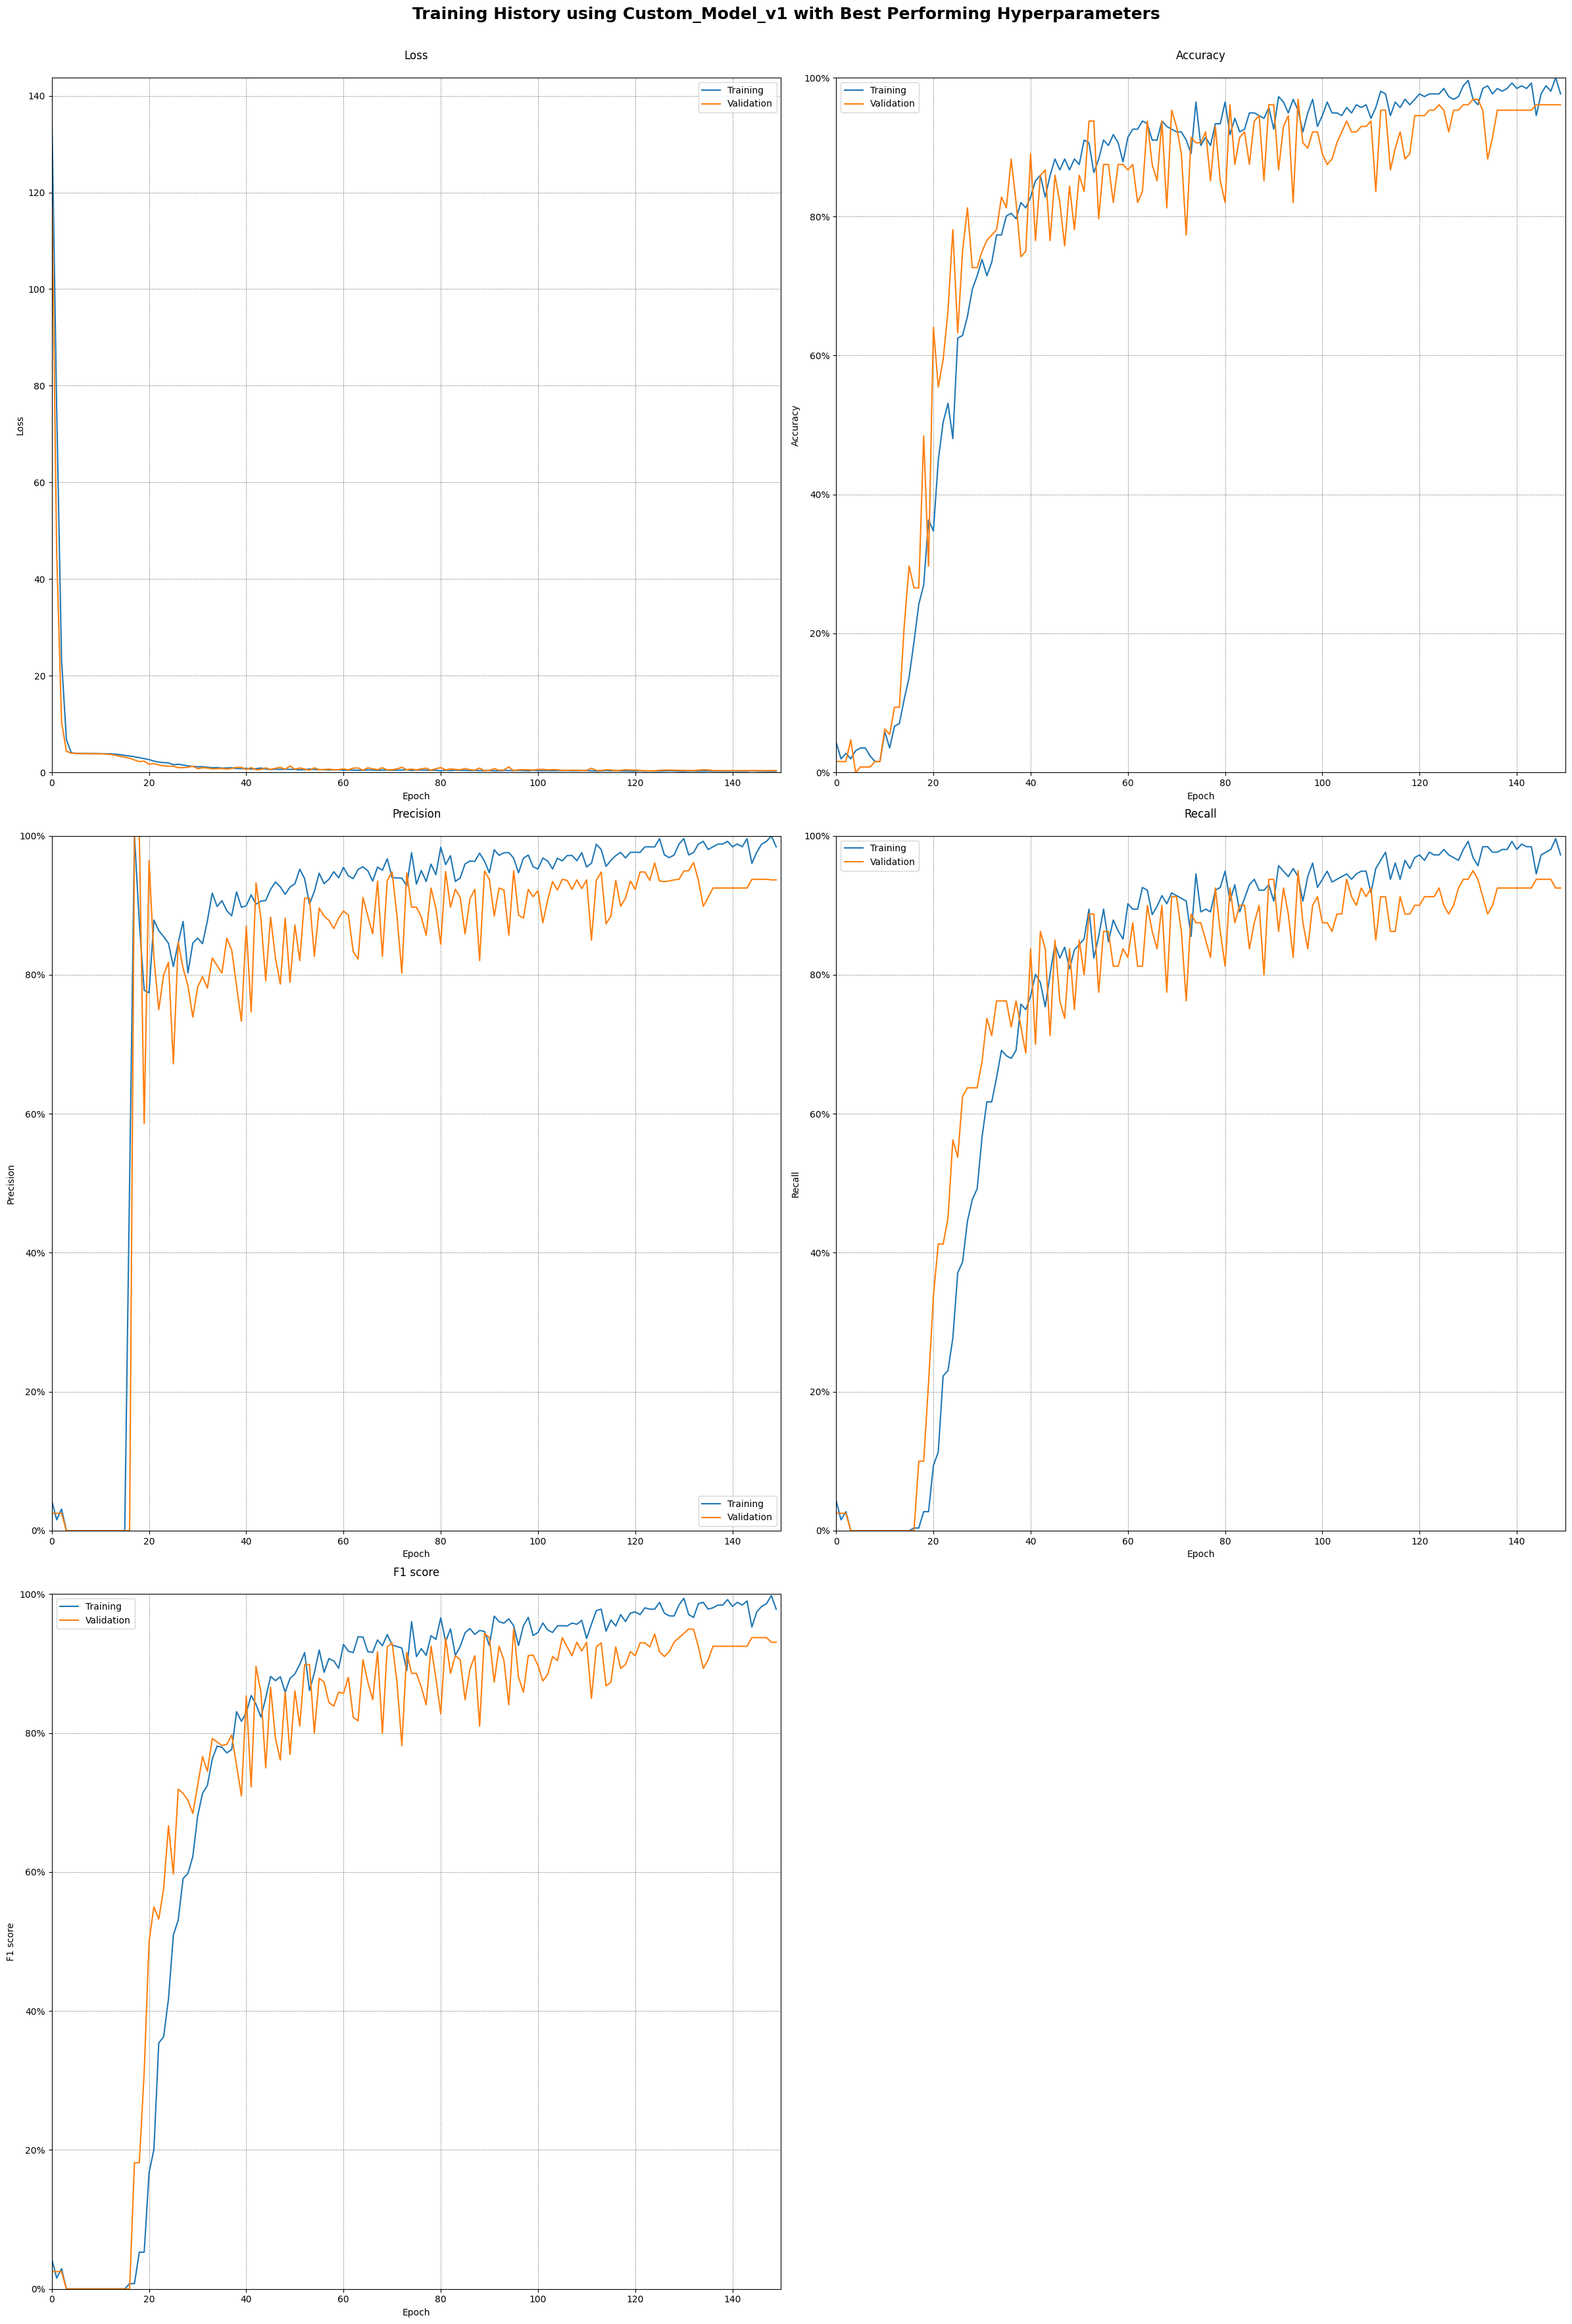

In [105]:
# Example call after training:
plot_training_history(history, model.name, title='Training History')

##### 1.4.3.1.1. <a id='toc1_4_3_1_1_'></a>[**[OPTIONAL] Plot Hyperparameter Search Results**](#toc0_) [&#8593;](#toc0_)

In [ ]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import logging

# Set logging level to INFO
logger.basicConfig(level=logger.CRITICAL)

# Define the directory containing the trial folders
base_dir = "hyperparameter_tuning/keras_tuner_project"

# Metrics to extract and plot
metrics_to_plot = [
    "accuracy", "loss", "auc", "precision", "recall", "f1_score",
    "val_accuracy", "val_loss", "val_auc", "val_precision", "val_recall", "val_f1_score"
]

# Initialize storage for metrics
all_metrics = {metric: [] for metric in metrics_to_plot}
trial_ids = []
scores = []

# Iterate through each trial folder and extract metrics
for trial_folder in sorted(os.listdir(base_dir)):
    trial_path = os.path.join(base_dir, trial_folder)
    trial_json_path = os.path.join(trial_path, "trial.json")

    if os.path.isdir(trial_path) and os.path.exists(trial_json_path):
        with open(trial_json_path, "r") as f:
            trial_data = json.load(f)
            trial_id = trial_data.get("trial_id")
            metrics = trial_data.get("metrics", {}).get("metrics", {})

            # Skip trials with missing score or metrics
            if not trial_data.get("score") or not metrics:
                continue

            trial_ids.append(trial_id)
            scores.append(trial_data.get("score", 0))

            # Extract the last recorded value for each metric
            for metric in metrics_to_plot:
                if metric in metrics:
                    observations = metrics[metric]["observations"]
                    if observations:
                        value = observations[-1]["value"][0]  # Get the last value
                        all_metrics[metric].append(value if value is not None else 0)
                    else:
                        all_metrics[metric].append(0)
                else:
                    all_metrics[metric].append(0)

# Plot separate subplots for each metric
fig, axs = plt.subplots(len(metrics_to_plot), 1, figsize=(15, 5 * len(metrics_to_plot)))

# Use a color palette from seaborn
colors = sns.color_palette("husl", len(trial_ids))

for idx, metric in enumerate(metrics_to_plot):
    bars = axs[idx].bar(trial_ids, all_metrics[metric], color=colors)
    axs[idx].set_title(f'{metric} across Trials')
    axs[idx].set_xlabel('Trial ID')
    axs[idx].set_ylabel(metric)
    axs[idx].grid(True)

    # Add labels to each bar
    for bar in bars:
        yval = bar.get_height()
        axs[idx].text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{yval:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Plot heatmap of metrics
metrics_array = np.array([all_metrics[metric] for metric in metrics_to_plot]).T
plt.figure(figsize=(15, 10))
sns.heatmap(metrics_array, annot=True, cmap='viridis', xticklabels=metrics_to_plot, yticklabels=trial_ids)
plt.title("Heatmap of Metrics across Trials")
plt.xlabel("Metrics")
plt.ylabel("Trial ID")
plt.show()

# Scatter plots for hyperparameters vs. score (example)
# Assuming hyperparameters like learning_rate, dropout_rate are available in trial data
hyperparameters_to_plot = ["learning_rate", "dropout_rate"]
hyperparameters = {param: [] for param in hyperparameters_to_plot}

# Extract hyperparameters for scatter plot
for trial_folder in sorted(os.listdir(base_dir)):
    trial_path = os.path.join(base_dir, trial_folder)
    trial_json_path = os.path.join(trial_path, "trial.json")

    if os.path.isdir(trial_path) and os.path.exists(trial_json_path):
        with open(trial_json_path, "r") as f:
            trial_data = json.load(f)
            hyper_params = trial_data.get("hyperparameters", {}).get("values", {})

            for param in hyperparameters_to_plot:
                if param in hyper_params:
                    hyperparameters[param].append(hyper_params[param])
                else:
                    hyperparameters[param].append(None)

# Filter out trials with missing hyperparameters
valid_indices = [i for i, score in enumerate(scores) if all(hyperparameters[param][i] is not None for param in hyperparameters_to_plot)]

filtered_scores = [scores[i] for i in valid_indices]
filtered_hyperparameters = {param: [hyperparameters[param][i] for i in valid_indices] for param in hyperparameters_to_plot}

# Plot scatter plots of hyperparameters vs. score
for param in hyperparameters_to_plot:
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_hyperparameters[param], filtered_scores, color='darkred')
    plt.xlabel(param)
    plt.ylabel('Score')
    plt.title(f'{param} vs. Score')
    plt.grid(True)
    plt.show()

# Plot score values across trials with filled area below the line
plt.figure(figsize=(15, 6))
plt.plot(trial_ids, scores, color='blue', marker='o', linestyle='-', linewidth=2, label='Score')
plt.fill_between(trial_ids, scores, color='blue', alpha=0.2)
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f'{score:.3f}', ha='center', fontsize=10, fontweight='bold')
plt.xlabel('Trial ID')
plt.ylabel('Score')
plt.title('Score Values across Trials')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

##### 1.4.3.1.2. <a id='toc1_4_3_1_2_'></a>[**Test Trained Custom Model**](#toc0_)

In [115]:
from keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from keras.applications.inception_v3 import preprocess_input as inception_preprocess
from keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from keras.applications.resnet_v2 import preprocess_input as resnet_preprocess
from keras.applications.vgg16 import preprocess_input as vgg_preprocess

from keras.preprocessing import image # Import the necessary module

from dotenv import load_dotenv

# Load config.yaml
config = load_config('config.yaml')

# Create a dictionary mapping string names to preprocessing functions
preprocessing_functions = {
    'efficientnet_preprocess': efficientnet_preprocess,
    'inception_preprocess': inception_preprocess,
    'mobilenet_preprocess': mobilenet_preprocess,
    'resnet_preprocess': resnet_preprocess,
    'vgg_preprocess': vgg_preprocess
}

def predict_image_class(model, img_path, class_names, target_size, preprocessing_function_name=None):
    target_size = target_size  # Get the target size for the chosen architecture
    color_mode = config['data']['color_mode']

    print(f'Target Size is: {target_size}')
    print(f'Color Mode is: {color_mode}')
    print(f'Image Path is: {img_path}')
    print(f'Model is: {model}')

    if preprocessing_function_name:
        preprocessing_function = preprocessing_functions.get(preprocessing_function_name)
        print(f'Preprocessing Function is: {preprocessing_function_name}')
    else:
        print(f'Preprocessing Function is: Custom Model no preprocessing function defined')

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size, color_mode=color_mode)
    img_array = image.img_to_array(img)
    print(f'Image Array Shape is: {img_array.shape}')
    img_array = np.expand_dims(img_array, axis=0)
    print(f'Image NP Array Shape after expanding is: {img_array.shape}\n')

    if preprocessing_function_name:
        img_array = preprocessing_function(img_array)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_index]
    confidence = predictions[0][predicted_class_index]

    return predicted_class, confidence

def visualize_prediction(img_path, target_size, predicted_class, confidence):
    img = image.load_img(img_path, target_size=target_size)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}")
    plt.show()


Testing model on new images:

['s15-6.png', 's3-3.png', 's23-8.png', 's27-1.png', 's10-10.png', 's34-6.png', 's9-9.png', 's40-2.png', 's39-4.png', 's14-5.png']
The prepocessing function is: Custom Model no preprocessing fuction defined
The compiled model is: Custom_Model_v1
The class names are: ['s1', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's2', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's3', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37', 's38', 's39', 's4', 's40', 's5', 's6', 's7', 's8', 's9']


_________________________________________________


Image File Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s15-6.png
Target Size is: [112, 92]
Color Mode is: grayscale
Image Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s15-6.png
Model is: <keras.src.engine.functional.Functional object at

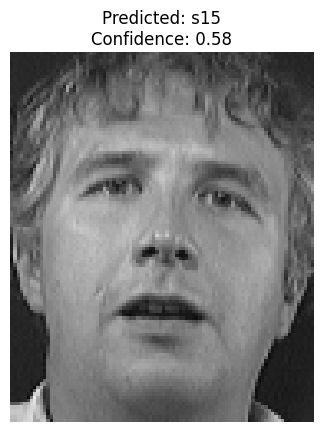


_________________________________________________


Image File Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s3-3.png
Target Size is: [112, 92]
Color Mode is: grayscale
Image Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s3-3.png
Model is: <keras.src.engine.functional.Functional object at 0x7c8bf8291cf0>
Preprocessing Function is: Custom Model no preprocessing function defined
Image Array Shape is: (112, 92, 1)
Image NP Array Shape after expanding is: (1, 112, 92, 1)

1/1 [==============================] - 0s 28ms/step

Image: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s3-3.png
Predicted class: s3
Confidence: 1.00



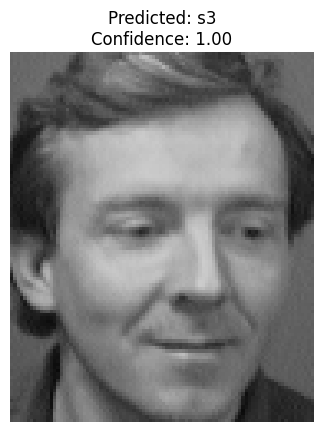


_________________________________________________


Image File Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s23-8.png
Target Size is: [112, 92]
Color Mode is: grayscale
Image Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s23-8.png
Model is: <keras.src.engine.functional.Functional object at 0x7c8bf8291cf0>
Preprocessing Function is: Custom Model no preprocessing function defined
Image Array Shape is: (112, 92, 1)
Image NP Array Shape after expanding is: (1, 112, 92, 1)

1/1 [==============================] - 0s 29ms/step

Image: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s23-8.png
Predicted class: s23
Confidence: 0.92



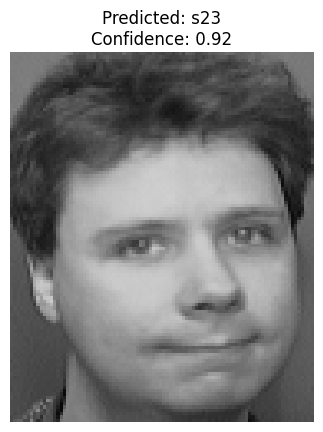


_________________________________________________


Image File Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s27-1.png
Target Size is: [112, 92]
Color Mode is: grayscale
Image Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s27-1.png
Model is: <keras.src.engine.functional.Functional object at 0x7c8bf8291cf0>
Preprocessing Function is: Custom Model no preprocessing function defined
Image Array Shape is: (112, 92, 1)
Image NP Array Shape after expanding is: (1, 112, 92, 1)

1/1 [==============================] - 0s 29ms/step

Image: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s27-1.png
Predicted class: s27
Confidence: 0.64



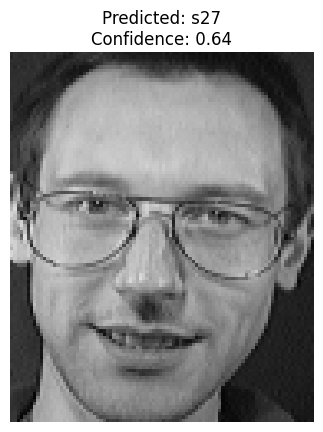


_________________________________________________


Image File Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s10-10.png
Target Size is: [112, 92]
Color Mode is: grayscale
Image Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s10-10.png
Model is: <keras.src.engine.functional.Functional object at 0x7c8bf8291cf0>
Preprocessing Function is: Custom Model no preprocessing function defined
Image Array Shape is: (112, 92, 1)
Image NP Array Shape after expanding is: (1, 112, 92, 1)

1/1 [==============================] - 0s 30ms/step

Image: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s10-10.png
Predicted class: s10
Confidence: 1.00



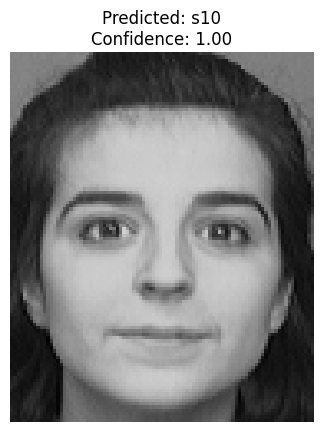


_________________________________________________


Image File Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s34-6.png
Target Size is: [112, 92]
Color Mode is: grayscale
Image Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s34-6.png
Model is: <keras.src.engine.functional.Functional object at 0x7c8bf8291cf0>
Preprocessing Function is: Custom Model no preprocessing function defined
Image Array Shape is: (112, 92, 1)
Image NP Array Shape after expanding is: (1, 112, 92, 1)

1/1 [==============================] - 0s 30ms/step

Image: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s34-6.png
Predicted class: s34
Confidence: 1.00



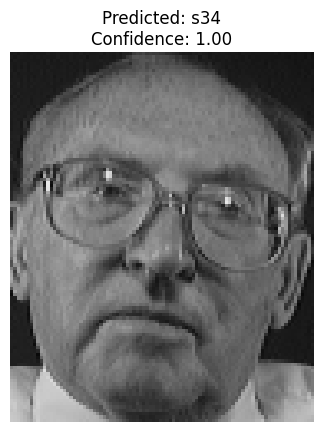


_________________________________________________


Image File Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s9-9.png
Target Size is: [112, 92]
Color Mode is: grayscale
Image Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s9-9.png
Model is: <keras.src.engine.functional.Functional object at 0x7c8bf8291cf0>
Preprocessing Function is: Custom Model no preprocessing function defined
Image Array Shape is: (112, 92, 1)
Image NP Array Shape after expanding is: (1, 112, 92, 1)

1/1 [==============================] - 0s 29ms/step

Image: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s9-9.png
Predicted class: s9
Confidence: 1.00



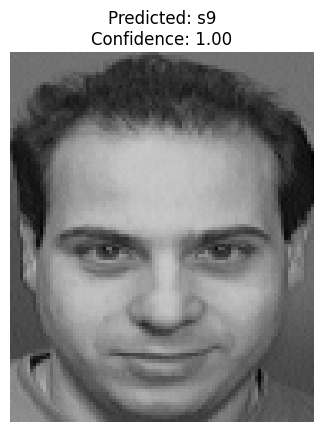


_________________________________________________


Image File Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s40-2.png
Target Size is: [112, 92]
Color Mode is: grayscale
Image Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s40-2.png
Model is: <keras.src.engine.functional.Functional object at 0x7c8bf8291cf0>
Preprocessing Function is: Custom Model no preprocessing function defined
Image Array Shape is: (112, 92, 1)
Image NP Array Shape after expanding is: (1, 112, 92, 1)

1/1 [==============================] - 0s 29ms/step

Image: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s40-2.png
Predicted class: s40
Confidence: 1.00



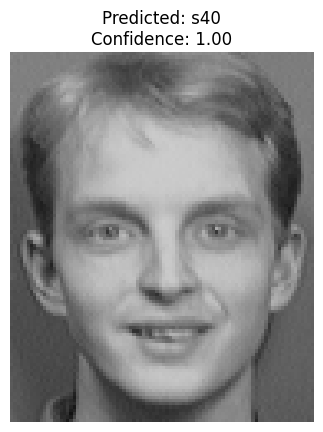


_________________________________________________


Image File Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s39-4.png
Target Size is: [112, 92]
Color Mode is: grayscale
Image Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s39-4.png
Model is: <keras.src.engine.functional.Functional object at 0x7c8bf8291cf0>
Preprocessing Function is: Custom Model no preprocessing function defined
Image Array Shape is: (112, 92, 1)
Image NP Array Shape after expanding is: (1, 112, 92, 1)

1/1 [==============================] - 0s 29ms/step

Image: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s39-4.png
Predicted class: s39
Confidence: 1.00



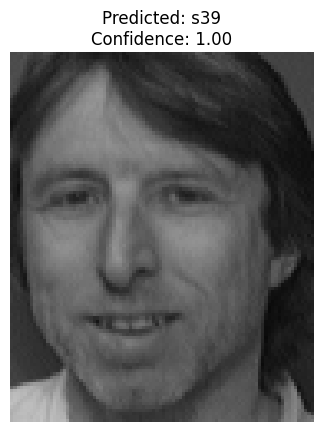


_________________________________________________


Image File Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s14-5.png
Target Size is: [112, 92]
Color Mode is: grayscale
Image Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s14-5.png
Model is: <keras.src.engine.functional.Functional object at 0x7c8bf8291cf0>
Preprocessing Function is: Custom Model no preprocessing function defined
Image Array Shape is: (112, 92, 1)
Image NP Array Shape after expanding is: (1, 112, 92, 1)

1/1 [==============================] - 0s 29ms/step

Image: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_112x92x1/s14-5.png
Predicted class: s14
Confidence: 1.00



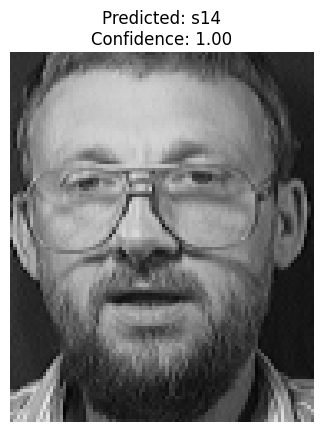

In [111]:
# Mount Google Drive if using Colab
try:
    from google.colab import drive
    load_dotenv(verbose=True, dotenv_path='.env', override=True)
    DATASET_PATH = os.getenv('COLAB_DATASET_PATH')
    logger.debug("MF Running in Colab environment")
except ImportError:
    load_dotenv(verbose=True, dotenv_path='.env', override=True)
    DATASET_PATH = os.getenv('DATASET_PATH', default='/default/dataset/path')
    logger.debug("MF Running in local environment")

print()
print("Testing model on new images:")
print()

# Get the list of all files in the model_test_images directory
test_image_path = f'{DATASET_PATH}/validation_dataset_png_112x92x1'
image_files = os.listdir(f'{test_image_path}/')

# Optionally, filter the list to include only image files
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
image_files = [file for file in image_files if file.lower().endswith(image_extensions)]

# Print the list of image files
print(image_files)

preprocessing_function = None
if preprocessing_function:
  print(f'The preprocessing function is: {preprocessing_function}')
else:
  print(f'The prepocessing function is: Custom Model no preprocessing fuction defined')
print(f'The compiled model is: {model.name}')
print(f'The class names are: {class_names}\n')

# for img_path in test_image_paths:
for image_file in image_files:
    img_path = f'{test_image_path}/{image_file}'
    print(f'\n_________________________________________________\n')
    print(f'\nImage File Path is: {img_path}')
    # predicted_class, confidence = predict_image_class(model, img_path, class_names, target_size, preprocessing_function)
    predicted_class, confidence = predict_image_class(model, img_path, class_names, target_size, preprocessing_function)
    print()
    print(f"Image: {img_path}")
    print(f"Predicted class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}")
    print()

    # Visualize prediction
    visualize_prediction(img_path, target_size, predicted_class, confidence)


### 1.4.4. <a id='toc1_4_4_'></a>[**Train Model using Transfer Learning with VGG16 Pre-Trained Model**](#toc0_)

Will train a new model based on Transfer Learning, using the GVV16 Pre-Trained Model. Below is the list of values used in the configuration file for this custom model build, config and training:

```yaml
logging:
  log_dir: 'logs'            # Directory for saving logs
  log_file: '1697032566-training.log'    
  log_level: 'CRITICAL'      # Logging level

model:
  name: 'VGG16'                            # Model name
  preprocessing_function: 'vgg_preprocess'   # Function for preprocessing images
  use_pretrained_weights: True                 # Use pre-trained weights or not
  input_shape: [224, 224, 3]                    # Input image dimensions
  dense_units: 128                              # Units in the dense layer
  dropout_rate: 0.3                             # Dropout rate
  initial_learning_rate: 0.0003                 # Initial learning rate
  decay_steps: 100                              # Learning rate decay steps
  decay_rate: 0.96                              # Learning rate decay rate
  fine_tune_learning_rate: 1e-5                 # Learning rate for fine-tuning
  additional_metrics:                           # List of metrics to track
    - Precision
    - Recall
    - AUC
    - F1Score

augmentation:
  enabled: True                      # Toggle to enable/disable data augmentation
  rotation_range: 5                  # Rotation in degrees (<= 360)
  width_shift_range: 0.1             # Width shift fraction (<= 1.0)
  height_shift_range: 0.1            # Height shift fraction (<= 1.0)
  horizontal_flip: True              # Enable horizontal flipping
  vertical_flip: False               # Enable vertical flipping
  zoom_range: 0.2                    # Zoom range (<= 1.0)
  brightness_range: 0.8              # Brightness adjustment

data:
  pre_split: False                            # Pre-split dataset directories or not
  test_val_size: 0.4                          # Test+Val dataset size in percentage of total dataset
  test_val_split: 0.5                         # Test and Validation split ratio of test_val_size (0.5 = 50%)
  dataset_dir: 'att_faces_png_224x224x3'                    # Root dataset directory (used if pre_split=True)
  train_dir: 'train_dataset'                  # Directory for training data
  test_dir: 'test_dataset'                    # Directory for test data
  validation_dir: 'val_dataset'               # Directory for validation data
  color_mode: 'rgb'                     # Image color mode 'rgb' or 'grayscale'
  batch_size: 64                              # Batch size for training
  input_shape: [224, 224, 3]                  # [112, 92, 1] - Input image dimensions
  target_size: [224, 224]                     # [112, 92] - Image resizing dimensions

tuning:
  perform_tuning: False              # Toggle for performing hyperparameter tuning
  max_trials: 2                      # Maximum number of tuning trials
  executions_per_trial: 1            # Number of executions per tuning trial

training:
  override: False                                # Use custom model training configuration
  initial_epochs: 150                           # Number of initial epochs
  fine_tune_epochs: 0                           # Number of fine-tuning epochs
  patience: 50                                  # Early stopping patience
  target_accuracy: 0.99                         # Desired target accuracy
  find_lr: False                                # Enable learning rate finder
  model_checkpoint_path: 'checkpoints/checkpoint.h5.keras'  # Path for saving the model checkpoint

hyperparameters:
  pretrained_model:                  # Hyperparameters for pre-trained models
    num_dense_layers:
      min: 1
      max: 3
      default: 2
    dense_units:
      min: 128
      max: 1024
      step: 128
      default: 512
    dropout_rate:
      min: 0.0
      max: 0.7
      step: 0.1
      default: 0.5
    use_batch_norm:
      default: False
    optimizer:
      choices: ['adam', 'sgd']
      default: 'adam'
    learning_rate:
      min: 1e-5
      max: 1e-3
      default: 0.0003

  scratch_model:
    num_conv_layers:
      min: 1
      max: 5
      default: 2
    conv_filters_scratch:
      min: 32
      max: 256
      step: 32
      default: 32
    conv_kernel_size_scratch:
      choices: [3, 5]
      default: 5
    use_conv_batch_norm_scratch:
      default: False
    conv_dropout_rate_scratch:
      min: 0.0
      max: 0.5
      step: 0.1
      default: 0.0
    num_dense_layers_scratch:
      min: 1
      max: 4
      default: 2
    dense_units_scratch:
      min: 64
      max: 512
      step: 64
      default: 128
    use_dense_batch_norm_scratch:
      default: False
    dropout_rate_scratch:
      min: 0.0
      max: 0.5
      step: 0.1
      default: 0.0
    optimizer_scratch:
      choices: ['adam', 'sgd']
      default: 'adam'
    learning_rate_scratch:
      min: 1e-5
      max: 1e-2
      default: 0.001

reduce_lr_on_plateau:
  monitor: 'val_loss'                # Metric to monitor for reducing LR
  factor: 0.2                        # Factor to reduce LR by
  patience: 20                       # Patience before reducing LR
  min_lr: 1e-6                       # Minimum learning rate allowed
  verbose: 1                         # Verbosity level for logging LR changes

visualization:
  figure_size: [12, 4]               # Size of the training history plot
  history_plot_path: 'history_plot.png' # Path for saving the training history plot

gpu:
  memory_growth: true                # Allow GPU memory growth
  allow_growth: true                 # Allow dynamic GPU memory allocation
```

In [112]:
history, model, class_names, target_size, preprocessing_function, ptm_name = main('config.yaml')

The model output shape is: (None, 40)

The model input shape is: (None, 224, 224, 3)

Model Summary:
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                          

#### 1.4.4.1. <a id='toc1_4_4_1_'></a>[**Visualize Training And Validation Accuracy of VGG16 Transfer Learning Based Model Training**](#toc0_)

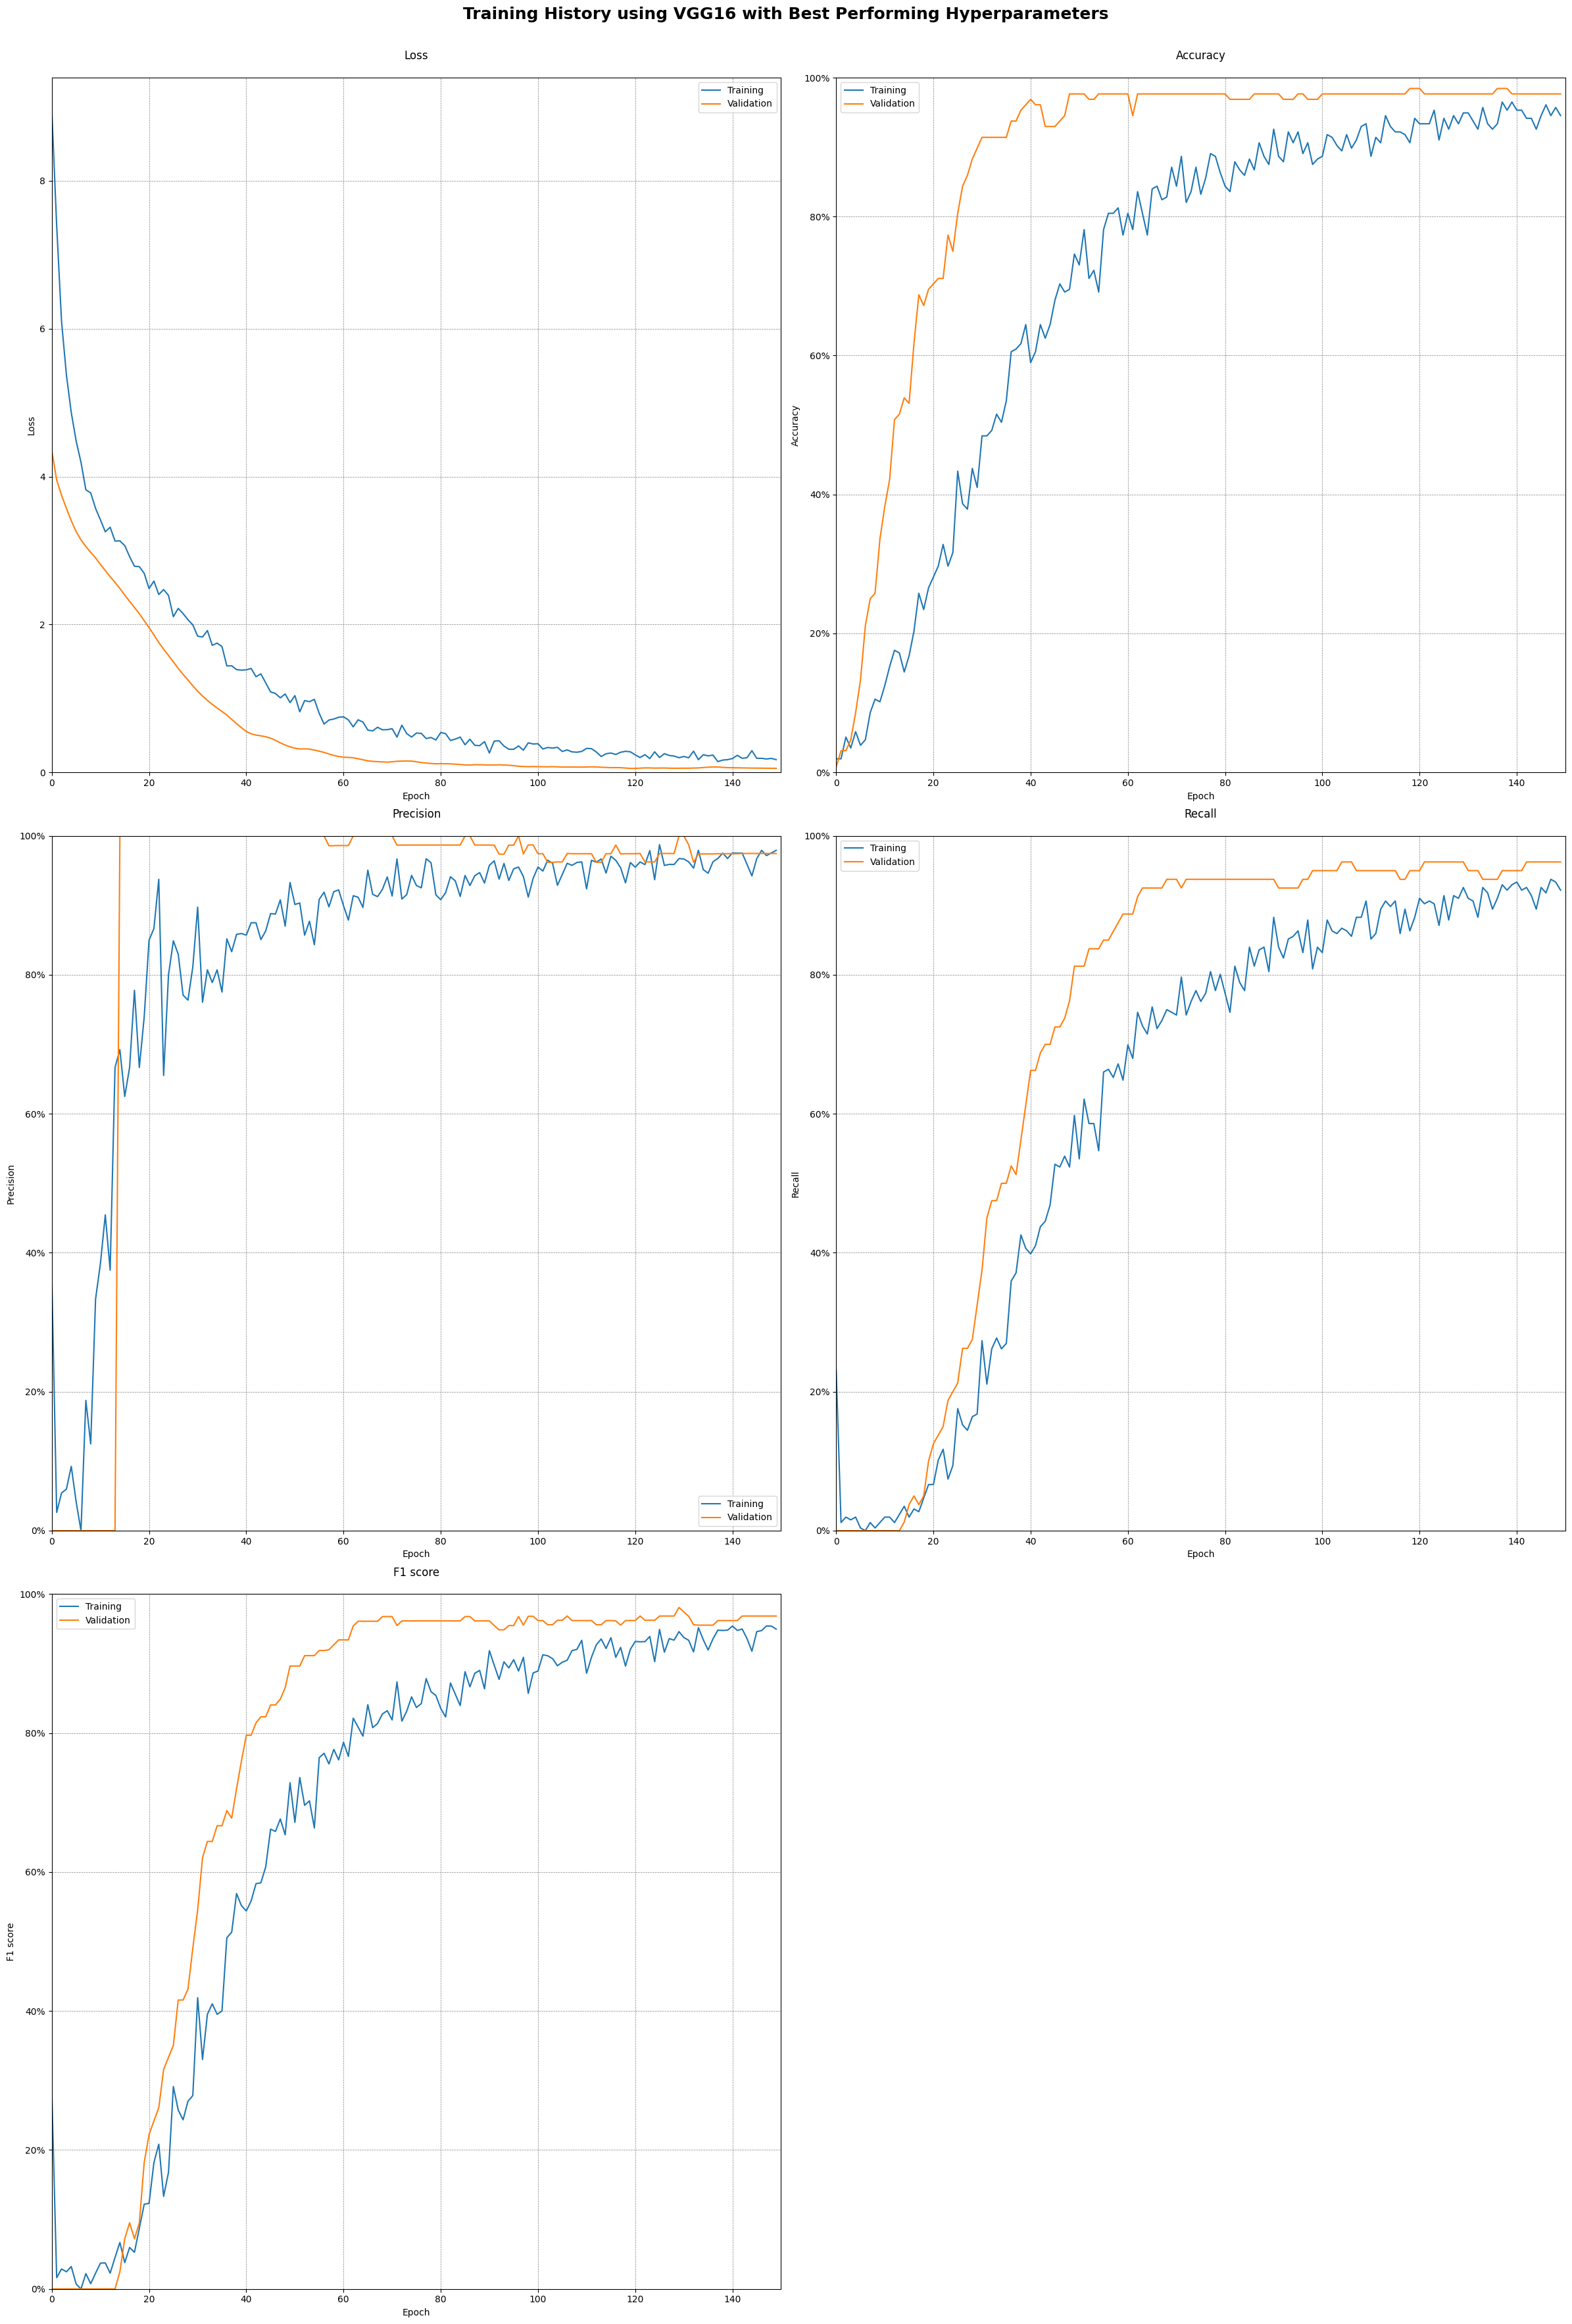

In [113]:
plot_training_history(history, ptm_name, title='Training History')

##### 1.4.4.1.1. <a id='toc1_4_4_1_1_'></a>[**Test Trained VGG16 Transfer Learning Based Trained Model**](#toc0_)


Testing model on new images:

['s9-9.png', 's10-10.png', 's34-6.png', 's3-3.png', 's27-1.png', 's39-4.png', 's40-2.png', 's15-6.png', 's14-5.png', 's23-8.png']
The preprocessing function is: vgg_preprocess
The compiled model is: model
The class names are: ['s1', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's2', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's3', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37', 's38', 's39', 's4', 's40', 's5', 's6', 's7', 's8', 's9']


_________________________________________________


Image File Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s9-9.png
Target Size is: [224, 224]
Color Mode is: rgb
Image Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s9-9.png
Model is: <keras.src.engine.functional.Functional object at 0x7c8a2420d4b0>
Preprocessing Function is: v

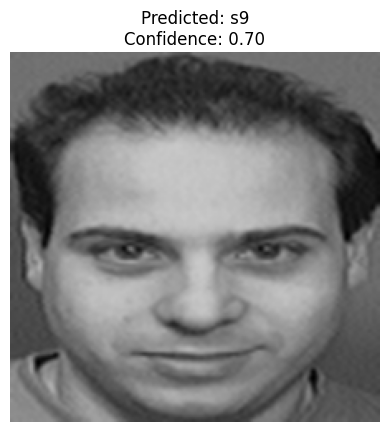


_________________________________________________


Image File Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s10-10.png
Target Size is: [224, 224]
Color Mode is: rgb
Image Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s10-10.png
Model is: <keras.src.engine.functional.Functional object at 0x7c8a2420d4b0>
Preprocessing Function is: vgg_preprocess
Image Array Shape is: (224, 224, 3)
Image NP Array Shape after expanding is: (1, 224, 224, 3)

1/1 [==============================] - 0s 78ms/step

Image: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s10-10.png
Predicted class: s10
Confidence: 0.23



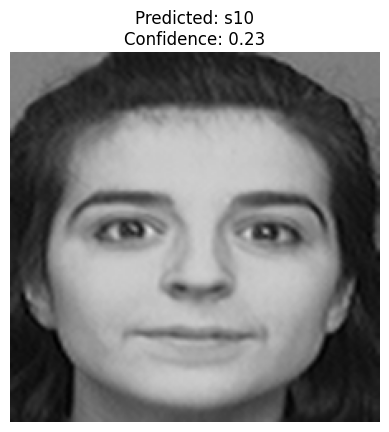


_________________________________________________


Image File Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s34-6.png
Target Size is: [224, 224]
Color Mode is: rgb
Image Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s34-6.png
Model is: <keras.src.engine.functional.Functional object at 0x7c8a2420d4b0>
Preprocessing Function is: vgg_preprocess
Image Array Shape is: (224, 224, 3)
Image NP Array Shape after expanding is: (1, 224, 224, 3)

1/1 [==============================] - 0s 77ms/step

Image: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s34-6.png
Predicted class: s27
Confidence: 0.29



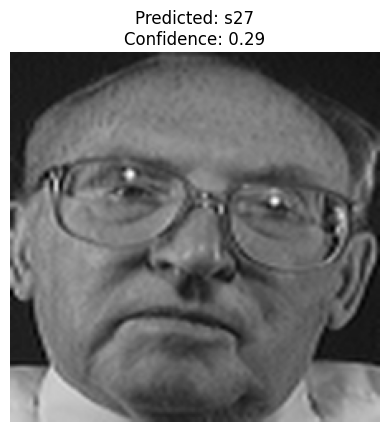


_________________________________________________


Image File Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s3-3.png
Target Size is: [224, 224]
Color Mode is: rgb
Image Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s3-3.png
Model is: <keras.src.engine.functional.Functional object at 0x7c8a2420d4b0>
Preprocessing Function is: vgg_preprocess
Image Array Shape is: (224, 224, 3)
Image NP Array Shape after expanding is: (1, 224, 224, 3)

1/1 [==============================] - 0s 74ms/step

Image: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s3-3.png
Predicted class: s3
Confidence: 0.98



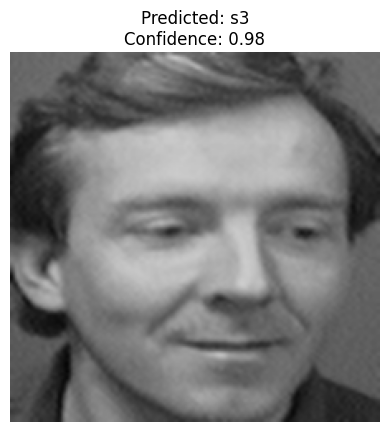


_________________________________________________


Image File Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s27-1.png
Target Size is: [224, 224]
Color Mode is: rgb
Image Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s27-1.png
Model is: <keras.src.engine.functional.Functional object at 0x7c8a2420d4b0>
Preprocessing Function is: vgg_preprocess
Image Array Shape is: (224, 224, 3)
Image NP Array Shape after expanding is: (1, 224, 224, 3)

1/1 [==============================] - 0s 75ms/step

Image: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s27-1.png
Predicted class: s27
Confidence: 0.98



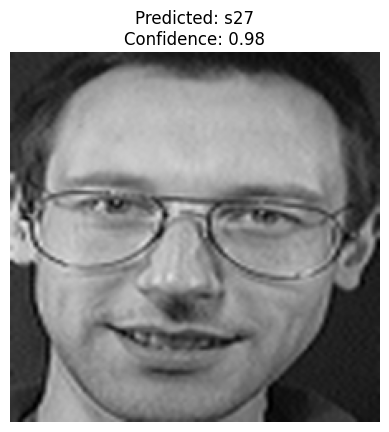


_________________________________________________


Image File Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s39-4.png
Target Size is: [224, 224]
Color Mode is: rgb
Image Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s39-4.png
Model is: <keras.src.engine.functional.Functional object at 0x7c8a2420d4b0>
Preprocessing Function is: vgg_preprocess
Image Array Shape is: (224, 224, 3)
Image NP Array Shape after expanding is: (1, 224, 224, 3)

1/1 [==============================] - 0s 78ms/step

Image: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s39-4.png
Predicted class: s38
Confidence: 0.25



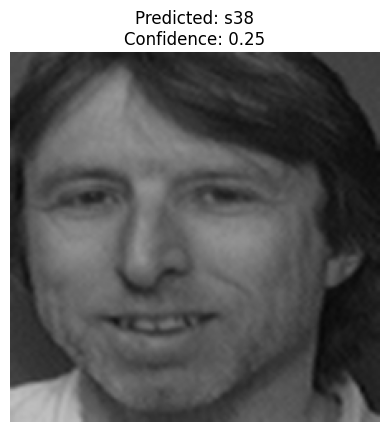


_________________________________________________


Image File Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s40-2.png
Target Size is: [224, 224]
Color Mode is: rgb
Image Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s40-2.png
Model is: <keras.src.engine.functional.Functional object at 0x7c8a2420d4b0>
Preprocessing Function is: vgg_preprocess
Image Array Shape is: (224, 224, 3)
Image NP Array Shape after expanding is: (1, 224, 224, 3)

1/1 [==============================] - 0s 71ms/step

Image: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s40-2.png
Predicted class: s40
Confidence: 0.32



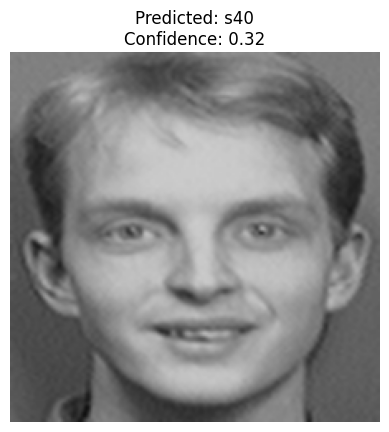


_________________________________________________


Image File Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s15-6.png
Target Size is: [224, 224]
Color Mode is: rgb
Image Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s15-6.png
Model is: <keras.src.engine.functional.Functional object at 0x7c8a2420d4b0>
Preprocessing Function is: vgg_preprocess
Image Array Shape is: (224, 224, 3)
Image NP Array Shape after expanding is: (1, 224, 224, 3)

1/1 [==============================] - 0s 77ms/step

Image: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s15-6.png
Predicted class: s15
Confidence: 0.77



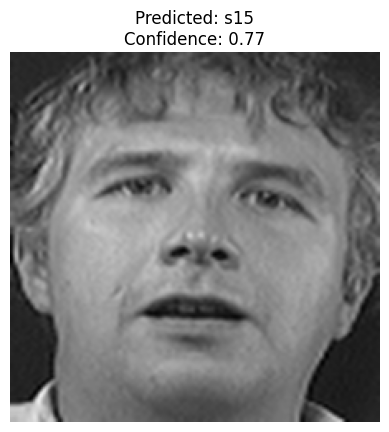


_________________________________________________


Image File Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s14-5.png
Target Size is: [224, 224]
Color Mode is: rgb
Image Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s14-5.png
Model is: <keras.src.engine.functional.Functional object at 0x7c8a2420d4b0>
Preprocessing Function is: vgg_preprocess
Image Array Shape is: (224, 224, 3)
Image NP Array Shape after expanding is: (1, 224, 224, 3)

1/1 [==============================] - 0s 75ms/step

Image: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s14-5.png
Predicted class: s14
Confidence: 1.00



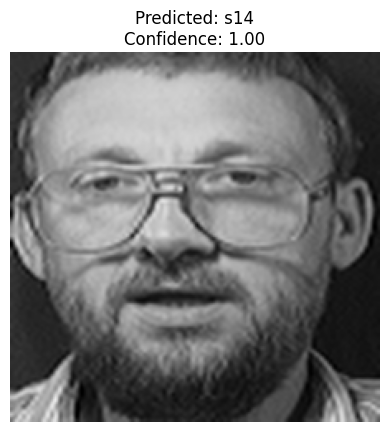


_________________________________________________


Image File Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s23-8.png
Target Size is: [224, 224]
Color Mode is: rgb
Image Path is: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s23-8.png
Model is: <keras.src.engine.functional.Functional object at 0x7c8a2420d4b0>
Preprocessing Function is: vgg_preprocess
Image Array Shape is: (224, 224, 3)
Image NP Array Shape after expanding is: (1, 224, 224, 3)

1/1 [==============================] - 0s 76ms/step

Image: /content/drive/MyDrive/Colab Notebooks/datasets/adlcv/projects/1697032566/validation_dataset_png_224x224x3/s23-8.png
Predicted class: s38
Confidence: 0.48



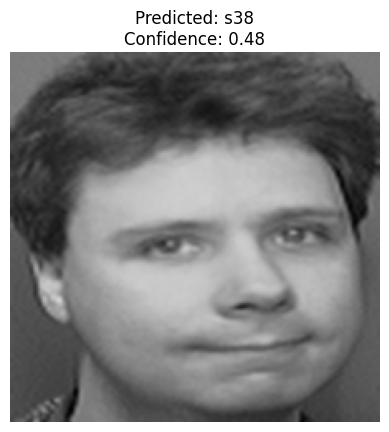

In [116]:
# Mount Google Drive if using Colab
try:
    from google.colab import drive
    load_dotenv(verbose=True, dotenv_path='.env', override=True)
    DATASET_PATH = os.getenv('COLAB_DATASET_PATH')
    logger.debug("MF Running in Colab environment")
except ImportError:
    load_dotenv(verbose=True, dotenv_path='.env', override=True)
    DATASET_PATH = os.getenv('DATASET_PATH', default='/default/dataset/path')
    logger.debug("MF Running in local environment")

print()
print("Testing model on new images:")
print()

# Get the list of all files in the model_test_images directory
test_image_path = f'{DATASET_PATH}/validation_dataset_png_224x224x3'
image_files = os.listdir(f'{test_image_path}/')

# Optionally, filter the list to include only image files
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
image_files = [file for file in image_files if file.lower().endswith(image_extensions)]

# Print the list of image files
print(image_files)

# preprocessing_function = vgg_preprocess

if preprocessing_function:
  print(f'The preprocessing function is: {preprocessing_function}')
else:
  print(f'The prepocessing function is: Custom Model no preprocessing fuction defined')
print(f'The compiled model is: {model.name}')
print(f'The class names are: {class_names}\n')

for image_file in image_files:
    img_path = f'{test_image_path}/{image_file}'
    print(f'\n_________________________________________________\n')
    print(f'\nImage File Path is: {img_path}')
    predicted_class, confidence = predict_image_class(model, img_path, class_names, target_size, preprocessing_function)
    print()
    print(f"Image: {img_path}")
    print(f"Predicted class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}")
    print()

    # Visualize prediction
    visualize_prediction(img_path, target_size, predicted_class, confidence)